<center><img src="https://imgur.com/f2fbbR6.jpg"></center>

<br>
<center><h1>📐 FIFA 22 players - Lineup visualization and more</h1></center>

# <a id='0'>Notebook Content</a>

### - <a href='#1'>1. Introduction</a>
### - <a href='#2'>2. Dataset</a>
### - <a href='#3'>3. Lineup Visualizations</a>
#### &ensp; - <a href='#31'>3.1. Lineup Visualizations of best FIFA players from each game version</a>
#### &ensp; - <a href='#32'>3.2. Lineup Visualizations of most popular European national leagues</a>
### - <a href='#4'>4. Clubs Analysis</a>
### - <a href='#5'>5. League Analysis</a>
### - <a href='#6'>6. Players Analysis</a>

# <a id='1'>1. Introduction</a>

<div class="alert alert-block alert-info" style="font-size:14px; line-height: 1.7em">
<p>🎯 <b>Goals</b>:
<li>Creating the functions that easily allow to draw the best lineups for two facing FIFA teams</li>
<li>Analysing the FIFA clubs, leagues, and players</li>
</p>
<br>
<p>🔨 <b>Tools</b>:
<li><i>numpy</i> and <i>pandas</i> for data manipulation</li>
<li><i>missingno</i> to display the missing data in the FIFA 22 dataset</li>
<li><i>seaborn</i> and <i>plotly</i> for data visualization</li>
</p>
</div>

FIFA is one of the most popular videogames that get released every year.

The purpose of this notebook is to analyse the FIFA players dataset available at this [Kaggle link](https://www.kaggle.com/stefanoleone992/fifa-22-complete-player-dataset), which provide information regarding players such as age, overall and potential attributes, club and league name, positions, and many others from the latest 8 editions of FIFA (from the 15th to the 22nd).

Once the dataset is read with *pandas* and the missing data gets displayed with the *missingno* library, some customized Python functions allow to draw the match-up against the best lineups of two teams on a football pitch.

The next step is the analysis of the players dataset, looking for insights about clubs, leagues and players.

# <a id='2'>2. Dataset</a>

<div class="alert alert-block alert-info" style="font-size:14px; line-height: 1.7em">
<p>⚠️ <b>Warnings</b>:
<li>The FIFA players data was collected from sofifa, which is the most reliable website sharing this type of information. However, some issues regarding missing data still exist.</li>
<li>The <i>mentality_compusure</i> attribute did not exist in FIFA 15, so the field is blank in the dataset for all players in the version 15</li>
<li>The <i>goalkeeping_speed</i> field is only provided on sofifa for goalkeepers</li>
</p>
</div>

Reading the dataset using the pandas library and displaying the first 5 records.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import defaultdict
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
from matplotlib.font_manager import FontProperties
from functools import reduce
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None


def open_fifa_version_df(fifa_version):
    df = pd.read_csv('/kaggle/input/fifa-22-complete-player-dataset/players_' + str(fifa_version) + '.csv', low_memory = False)
    df['fifa_version'] = int(fifa_version)
    new_cols_order = ['fifa_version'] + df.columns.to_list()[:-6] # removing picture URLs
    df = df[new_cols_order]
    return df


players_df = pd.DataFrame()
for fifa_version in range(15, 23): # upper bound excluded from range
    players_df = players_df.append(open_fifa_version_df(fifa_version))
print(len(players_df))
players_df.head(5)

142079


fifa_version  sofifa_id                                         player_url  \
0            15     158023  https://sofifa.com/player/158023/lionel-messi/...   
1            15      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2            15       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3            15      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4            15     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini               CF   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           LW, LM   
2          A. Robben                         Arjen Robben       RM, LM, RW   
3     Z. Ibrahimović                   Zlatan Ibrahimović               ST   
4           M. Neuer                   Manuel Peter Neuer               GK   

   overall  potential    value_eur  wage_eur  age         dob  height_cm  \
0       93         95  100500000.0  550000.0   27  1987-06-24        169   
1       92         92   79000000.0  375000.0   29  1985-02-05        185   
2       90         90   54500000.0  275000.0   30  1984-01-23        180   
3       90         90   52500000.0  275000.0   32  1981-10-03        195   
4       90         90   63500000.0  300000.0   28  1986-03-27        193   

   weight_kg  club_team_id            club_name             league_name  \
0         67         241.0         FC Barcelona  Spain Primera Division   
1         80         243.0       Real Madrid CF  Spain Primera Division   
2         80          21.0    FC Bayern München    German 1. Bundesliga   
3         95          73.0  Paris Saint-Germain          French Ligue 1   
4         92          21.0    FC Bayern München    German 1. Bundesliga   

   league_level club_position  club_jersey_number club_loaned_from  \
0           1.0            CF                10.0              NaN   
1           1.0            LW                 7.0              NaN   
2           1.0           SUB                10.0              NaN   
3           1.0            ST                10.0              NaN   
4           1.0            GK                 1.0              NaN   

  club_joined  club_contract_valid_until  nationality_id nationality_name  \
0  2004-07-01                     2018.0              52        Argentina   
1  2009-07-01                     2018.0              38         Portugal   
2  2009-08-28                     2017.0              34      Netherlands   
3  2012-07-01                     2016.0              46           Sweden   
4  2011-07-01                     2019.0              21          Germany   

   nation_team_id nation_position  nation_jersey_number preferred_foot  \
0          1369.0              CF                  10.0           Left   
1          1354.0              LW                   7.0          Right   
2        105035.0              RS                  11.0           Left   
3          1363.0              ST                  10.0          Right   
4          1337.0              GK                   1.0          Right   

   weak_foot  skill_moves  international_reputation      work_rate  \
0          3            4                         5     Medium/Low   
1          4            5                         5       High/Low   
2          2            4                         5       High/Low   
3          4            4                         5     Medium/Low   
4          4            1                         5  Medium/Medium   

          body_type real_face  release_clause_eur  \
0     Normal (170-)       Yes                 NaN   
1     Normal (185+)       Yes                 NaN   
2  Normal (170-185)       Yes                 NaN   
3     Normal (185+)       Yes                 NaN   
4     Normal (185+)       Yes                 NaN   

                                         player_tags  \
0  #Speedster,

Visualizing the columns with missing values using the missingno library.

The main fields with missing data are 'club_loaned_from', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'player_tags', and 'goalkeeping_speed'.

value_eur                      1897
wage_eur                       1622
club_team_id                   1630
club_name                      1630
league_name                    1630
league_level                   2015
club_position                  1630
club_jersey_number             1630
club_loaned_from             133774
club_joined                    9935
club_contract_valid_until      1630
nation_team_id               133635
nation_position              133635
nation_jersey_number         133635
release_clause_eur            55582
player_tags                  130765
player_traits                 78771
pace                          15791
shooting                      15791
passing                       15791
dribbling                     15791
defending                     15791
physic                        15791
mentality_composure           31778
goalkeeping_speed            126288


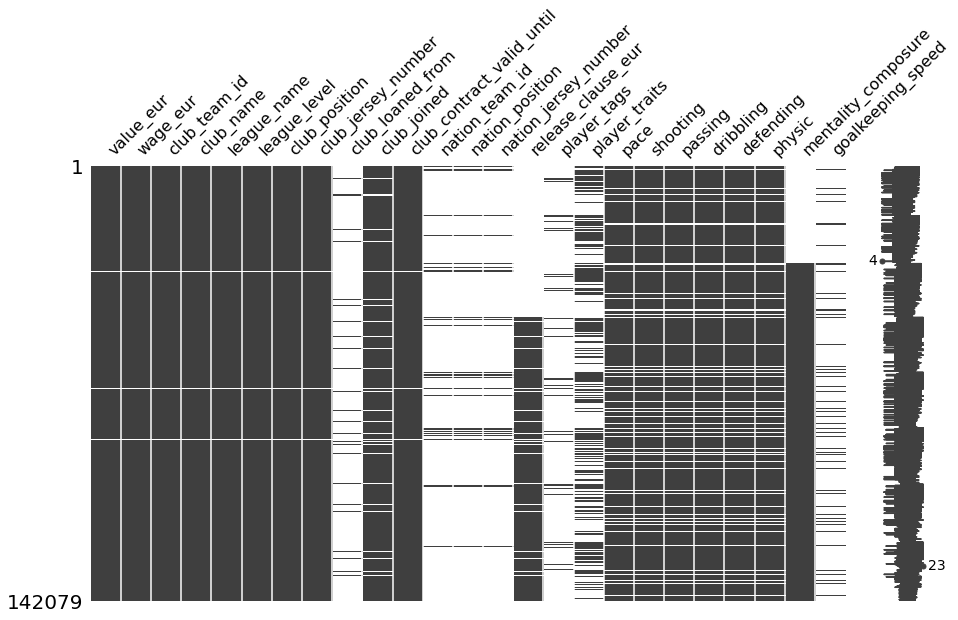

In [2]:
null_values_series = players_df.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.to_string()) # to_string() removes the name and dtype from the output
msno.matrix(players_df[null_values_series.index.tolist()], figsize=(15, 8));

# <a id='3'>3. Lineup Visualizations</a>

Here below are the formulas that add the 'best_position' and 'value_million_eur', and wrap all the actions required to visualize the best players on the pitch for two opposing teams selected from the FIFA dataset.

In [3]:
# adding the 'best_position' and 'value_million_eur' fields to each df
def add_position_and_value_fields(input_df):
    input_df['best_position'] = input_df['player_positions'].str.split(',').str[0]
    # about 1k players through all FIFA versions have no values associated - the NaN 'value_eur' values are replaced with 0
    input_df['value_eur'] = input_df['value_eur'].fillna(0)
    input_df['value_million_eur'] = pd.to_numeric(input_df['value_eur'], errors='coerce') / 1000000
    return input_df


players_df = add_position_and_value_fields(players_df)
df15 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 15])
df16 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 16])
df17 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 17])
df18 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 18])
df19 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 19])
df20 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 20])
df21 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 21])
df22 = add_position_and_value_fields(players_df[players_df['fifa_version'] == 22])

# functions for the lineup visualizations
# original code taken from https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b

!pip install mplsoccer
from mplsoccer.pitch import VerticalPitch

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

formations_dict = {'4-3-1-2': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '4-3-2-1': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'CAM|CF', 'CAM|CF', 'CF|ST'],
                   '4-3-3': ['GK', 'RB|RWB', 'LCB|CB', 'RCB|CB', 'LB|LWB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'RW|RF|ST', 'CF|ST', 'LW|LF|ST'],
                   '4-4-2': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '4-5-1': ['GK', 'RB|RWB', 'RCB|CB', 'LCB|CB', 'LB|LWB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CF|ST', 'CF|ST'],
                   '3-4-1-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RW', 'CDM|CM', 'CDM|CM', 'LM|LW', 'CAM|CF', 'CF|ST', 'CF|ST'],
                   '3-4-3': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RWB|RM', 'CDM|CM', 'CDM|CM', 'LWB|LM', 'RW|RF|ST', 'CF|ST', 'LW|LF|ST'],
                   '3-5-2': ['GK', 'RCB|CB', 'CB', 'LCB|CB', 'RM|RWB|RB', 'CDM|CM', 'CDM|CM', 'CDM|CM', 'LM|LWB|LB', 'CF|ST', 'CF|ST']}

# dictionary used to calculate the player coordinates on the pitch, based on the number of players per team section such as defence, etc.
xaxis_locations = {1: [40], 2: [30, 50], 3: [25, 40, 55], 4: [10, 30, 50, 70], 5: [10, 25, 40, 55, 70]}


def get_players_section_coord_col(players_coord_dict, players_col_dict, color_val, players_in_section, yaxis_val, team_order):
    if team_order == 'home':
        xaxis_val = xaxis_locations
    elif team_order == 'away':
        xaxis_val = {k: v[::-1] for k, v in xaxis_locations.items()} # reversing the X-axis for the opponent lineup 
        yaxis_val = 120 - yaxis_val # total pitch length is 120, so positions have the same distintance from the own team's goal
    else:
        raise ValueError('Invalid team_order value provided - Can be only "home" or "away"')
    for idx, val in enumerate(range(players_in_section)):
        players_coord_dict[len(players_coord_dict)] = [xaxis_val[players_in_section][idx], yaxis_val]
        players_col_dict[len(players_col_dict)] = color_val
    return players_coord_dict, players_col_dict


def get_player_locations_colors(formation, team_type='home'):
    lineup_sections = formation.split('-')
    defenders = int(lineup_sections[0])
    midfielders = int(lineup_sections[1])
    if len(lineup_sections) == 4:
        # trequartista spots are occupied
        trequartistas = int(lineup_sections[2])
        strikers = int(lineup_sections[3])
    elif len(lineup_sections) == 3:
        trequartistas = 0
        strikers = int(lineup_sections[2])
    if len(lineup_sections) not in [3, 4] or (defenders + midfielders + trequartistas + strikers) != 10:
        raise ValueError('Formation invalid - Missing or extra player sections other than defence, midfield, and offence')
    # getting the player locations and colors in two dictionaries that are gradually populated
    locations_dict = {}
    colors_dict = {}
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'darkslategrey', 1, 112, team_type) # GK
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'blue', defenders, 98, team_type) # DEFs
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'gold', midfielders, 84, team_type) # MIDs
    if trequartistas > 0:
        locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'red', trequartistas, 77, team_type) # CAMs
    locations_dict, colors_dict = get_players_section_coord_col(locations_dict, colors_dict, 'red', strikers, 70, team_type) # STRs
    return locations_dict, colors_dict


def get_best_formation(formation_df, club_name='', measurement='overall'):
    if club_name != '':
        formation_df = formation_df[formation_df['club_name'] == club_name]
    formations_total_vals = {}
    for formation in formations_dict:
        copied_df = formation_df.copy()
        pos_list = formations_dict[formation]
        total_vals = []
        for pos in pos_list:
            # get best record based on 'overall' or 'potential', then drop that record from copied df, so that it cannot be selected again
            if not np.isnan(copied_df[copied_df['best_position'].str.contains(pos)][measurement].max()):
                total_vals.append(copied_df[copied_df['best_position'].str.contains(pos)][measurement].max())
                copied_df.drop(copied_df[copied_df['best_position'].str.contains(pos)][measurement].idxmax(), inplace=True)
        if len(total_vals) == 11:
            formations_total_vals[formation] = sum(total_vals)
        else: # some formations might not find 11 available players - these ones need to be excluded from any possible calcuation
            formations_total_vals[formation] = 0
    best_formation = max(formations_total_vals, key=formations_total_vals.get)
    return best_formation


def get_best_lineup(lineup_df, club_name='', formation='', measurement=''):
    if club_name != '':
        df_copy = lineup_df[lineup_df['club_name'] == club_name]
    else:
        df_copy = lineup_df.copy()
    # if formation is not chosen, then the best one is calculated with a formula
    if formation == '':
        formation = get_best_formation(lineup_df, club_name, measurement)
    squad_lineup = formations_dict[formation]
    squad_default_dict = dict()
    for pos in squad_lineup:
        best_player_record = df_copy.loc[[df_copy[df_copy['best_position'].str.contains(pos)][measurement].idxmax()]]
        squad_default_dict[best_player_record['short_name'].to_string(index=False).strip(' \t')] = [
            best_player_record['best_position'].to_string(index=False).strip(' \t'),
            int(best_player_record[measurement].to_string(index=False)),
            int(best_player_record['age'].to_string(index=False)),
            float(best_player_record['value_million_eur'].to_string(index=False)),
            best_player_record['club_name'].to_string(index=False).strip(' \t')]
        df_copy.drop(df_copy[df_copy['best_position'].str.contains(pos)][measurement].idxmax(), inplace=True)
    return formation, squad_default_dict


def draw_pitch(axis):
    # pitch outline and centre line
    pitch = Rectangle([0, 0], width=80, height=120, edgecolor='black', fill=False) # facecolor='#23E04F'
    # left and right penalty area and midline
    left_penalty = Rectangle([22.3, 0], width=35.3, height=14.6, fill=False)
    right_penalty = Rectangle([22.3, 105.4], width=35.3, height=14.6, fill=False)
    midline = ConnectionPatch([0, 60], [80, 60], 'data', 'data')
    # left and right six-yard box
    left_six_yard = Rectangle([32, 0], width=16, height=4.9, fill=False)
    right_six_yard = Rectangle([32, 115.1], width=16, height=4.9, fill=False)
    # prepare circles
    centre_circle = plt.Circle((40, 60), 8.1, color='black', fill=False)
    centre_spot = plt.Circle((40, 60), 0.4, color='black')
    # penalty spots and arcs around penalty boxes
    # left_pen_spot = plt.Circle((40, 9.7), 0.4, color='black')
    # right_pen_spot = plt.Circle((40, 110.3), 0.4, color='black')
    left_arch = Arc((40, 9.5), width=16.2, height=16.2, angle=90, theta1=310, theta2=50, color='black')
    right_arch = Arc((40, 110.4), width=16.2, height=16.2, angle=90, theta1=130, theta2=230, color='black')
    elements_list = [pitch, left_penalty, right_penalty, midline, left_six_yard, right_six_yard, centre_circle, centre_spot,
                     left_arch, right_arch]
    for element in elements_list:
        axis.add_patch(element)


def draw_teams_matchup(home_df, away_df, home_title, away_title, home_team_name='', away_team_name='',
                       home_team_formation='', away_team_formation='', measurement='overall', drawn_pitch='manual'):
    # setting the figure where the matchup will be plotted
    fig = plt.figure()
    fig.set_size_inches(10, 14)
    ax = fig.add_subplot(1, 1, 1)
    if drawn_pitch == 'mplsoccer': # plotting the fancy pitch from 'mplsoccer'
        pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True)
        pitch.draw(ax=ax)
    else: # calling the function that draws the pitch
        draw_pitch(ax)
    # setting the field columns shown on the right-hand side of the figure
    if measurement == 'overall':
        note_columns = ('Position', 'Player Name', 'Overall Attribute', 'Age', 'Player Value (in €M)', 'Club Name')
    elif measurement == 'potential':
        note_columns = ('Position', 'Player Name', 'Potential Attribute', 'Age', 'Player Value (in €M)', 'Club Name')
    else:
        raise ValueError('Measurement value provided is not valid (nor "overall" neither "potential")')
    # drawing home team lineup
    home_formation, home_players = get_best_lineup(home_df, home_team_name, home_team_formation, measurement)
    home_players_list = list(home_players)
    home_locations_dict, home_colors_dict = get_player_locations_colors(home_formation, team_type='home')
    for i in range(len(home_players_list)):
        player_x, player_y = home_locations_dict[i][0], home_locations_dict[i][1]
        player_color = home_colors_dict[i]
        if '. ' in home_players_list[i]:
            player_name = home_players_list[i].split('. ', 1)[1]
        else:
            player_name = home_players_list[i]
        plt.annotate(player_name,
                     xy = (player_x, player_y), xytext = (0, 18),
                     bbox=dict(boxstyle='round', fc='w'), va='center', ha='center', textcoords='offset points')
        plt.scatter(player_x, player_y, s=250, c=player_color)
    # adding notes on the right-hand side of the home team
    home_team_list = []
    for k, v in home_players.items():
        home_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    home_sum_rating = home_sum_age = home_sum_value = 0
    for k, v in home_players.items():
        home_sum_rating = home_sum_rating + v[1]
        home_sum_age = home_sum_age + v[2]
        home_sum_value = home_sum_value + v[3]
    home_notes = [[home_title],
                  ['Average rating: {avg_rating}'.format(avg_rating=round((home_sum_rating/11), 1))],
                  ['Average age: {avg_age}'.format(avg_age=round((home_sum_age/11), 1))],
                  ['Total Value (in €M): {total_value:,}'.format(total_value=round(home_sum_value, 1))]]
    plt_table = plt.table(cellText=home_team_list, colLabels=note_columns,
                          colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5], cellLoc='right', loc='right', bbox=[1, 0.505, 1.7, 0.36])
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if (row == 0):
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    plt_home_notes = plt.table(cellText=home_notes, cellLoc='left', loc='left', bbox=[0.9, 0.87, 1.1, 0.12])
    for key, cell in plt_home_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    # drawing away team lineup
    away_formation, away_players = get_best_lineup(away_df, away_team_name, away_team_formation, measurement)
    away_players_list = list(away_players)
    away_locations_dict, away_colors_dict = get_player_locations_colors(away_formation, team_type='away')
    for i in range(len(away_players_list)):
        player_x, player_y = away_locations_dict[i][0], away_locations_dict[i][1]
        player_color = away_colors_dict[i]
        if '. ' in away_players_list[i]:
            player_name = away_players_list[i].split('. ', 1)[1]
        else:
            player_name = away_players_list[i]
        plt.annotate(player_name,
                     xy = (player_x, player_y), xytext = (0, 18),
                     bbox=dict(boxstyle='round', fc='w'), va='center', ha='center', textcoords='offset points')
        plt.scatter(player_x, player_y, s=250, c=player_color)
    # adding notes on the right-hand side of the away team
    away_team_list = []
    for k, v in away_players.items():
        away_team_list.append([v[0], k, v[1], v[2], v[3], v[4]])
    away_sum_rating = away_sum_age = away_sum_value = 0
    for k, v in away_players.items():
        away_sum_rating = away_sum_rating + v[1]
        away_sum_age = away_sum_age + v[2]
        away_sum_value = away_sum_value + v[3]
    away_notes = [[away_title],
                  ['Average rating: {avg_rating}'.format(avg_rating=round((away_sum_rating/11), 1))],
                  ['Average age: {avg_age}'.format(avg_age=round((away_sum_age/11), 1))],
                  ['Total Value (in €M): {total_value:,}'.format(total_value=round(away_sum_value, 1))]]
    plt_table = plt.table(cellText=away_team_list, colLabels=note_columns,
                          colWidths=[0.3, 0.5, 0.35, 0.2, 0.4, 0.5], cellLoc='right', loc='right', bbox=[1, 0.015, 1.7, 0.36])
    plt_table.scale(1.5, 2)
    for (row, col), cell in plt_table.get_celld().items():
        if (row == 0):
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    plt_away_notes = plt.table(cellText=away_notes, cellLoc='left', loc='left', bbox=[0.9, 0.38, 1.1, 0.12])
    for key, cell in plt_away_notes.get_celld().items():
        cell.set_linewidth(0)
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    # adding the final settings to the plot
    plt.xlim(-2, 82)
    plt.ylim(-2, 122)
    plt.axis('off')
    plt.show()

     |████████████████████████████████| 57 kB 538 kB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=e7dd2fc36d261d146819287bc8d8bce460096450b369a155d9f0b060f6425b43
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## <a id='31'>3.1. Lineup Visualizations of best FIFA players from each game version</a>

#### Dream Team of FIFA 22 vs FIFA 15 (Overall attributes)

<br>

<i>In the match-up between the latest and first available FIFA version - based on the overall attribute - there is no significant difference in the average player overall rating (90.2 for FIFA 22 vs 89.2 for FIFA 15), but the difference in the average player age is quite evident (with FIFA 15 having younger players on the pitch compared to FIFA 22 - 28.8 vs 31.2).</i>

<i>Only players in the best lineup for the first avilable and last FIFA version are Messi, C. Ronaldo, and Sergio Ramos.</i>

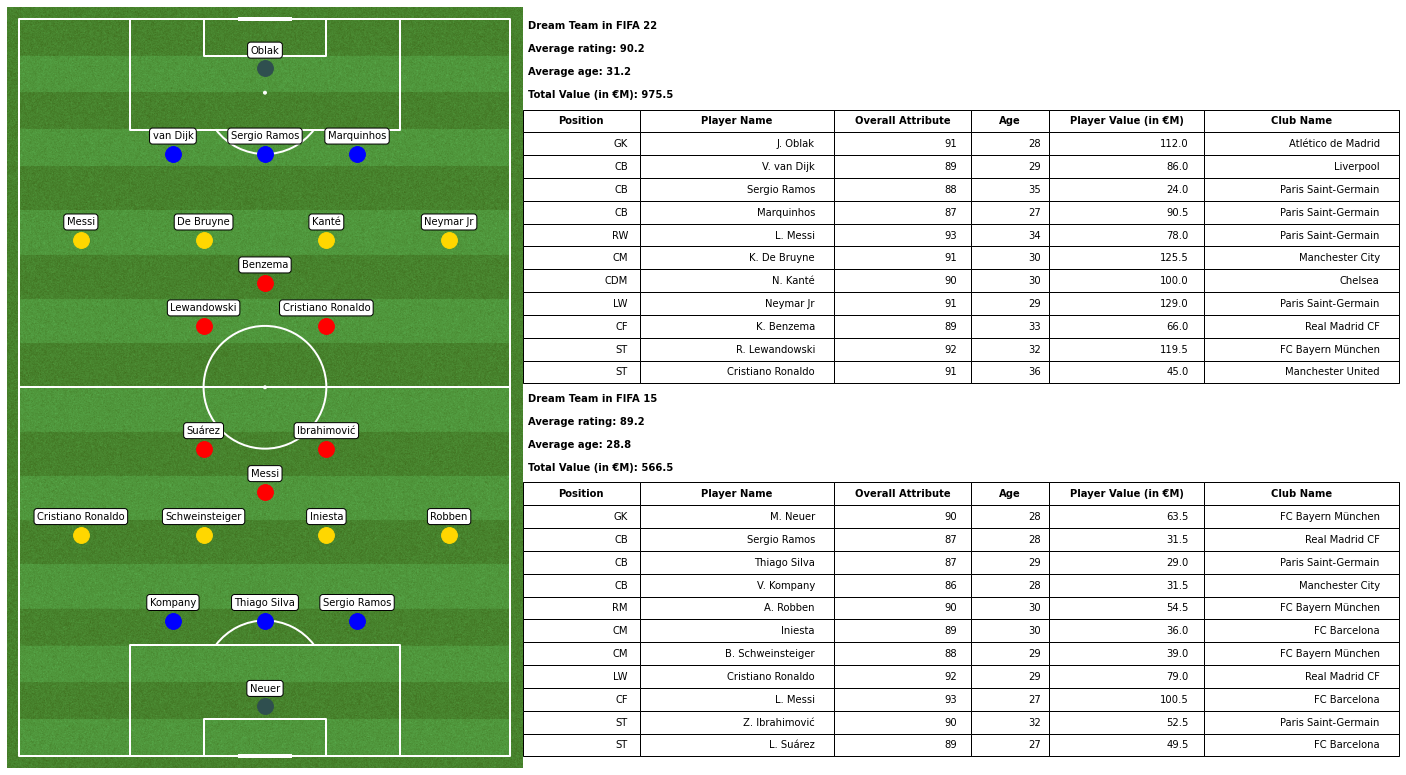

In [4]:
draw_teams_matchup(df22, df15, 'Dream Team in FIFA 22', 'Dream Team in FIFA 15', drawn_pitch='mplsoccer')

#### Highest Potential Team of FIFA 22 vs FIFA 15 (Potential attributes)

<br>

<i>In the match-up between the latest and first available FIFA version - based on the potential attribute - there is a difference of 1.7 in the average player potential rating (91.9 for FIFA 22 vs 90.2 for FIFA 15) and a difference of 1.1 in the average player age (25.7 for FIFA 22 vs 26.8 for FIFA 15).</i>

<i>Only players in the best lineup - based on overall and potential attribute - for the first avilable FIFA version are Messi, Suarez, and Ibrahimovic.</i>

<i>It is worth to notice that the FIFA 22 best potential lineup includes the rising stars Haaland and Mbappe.</i>

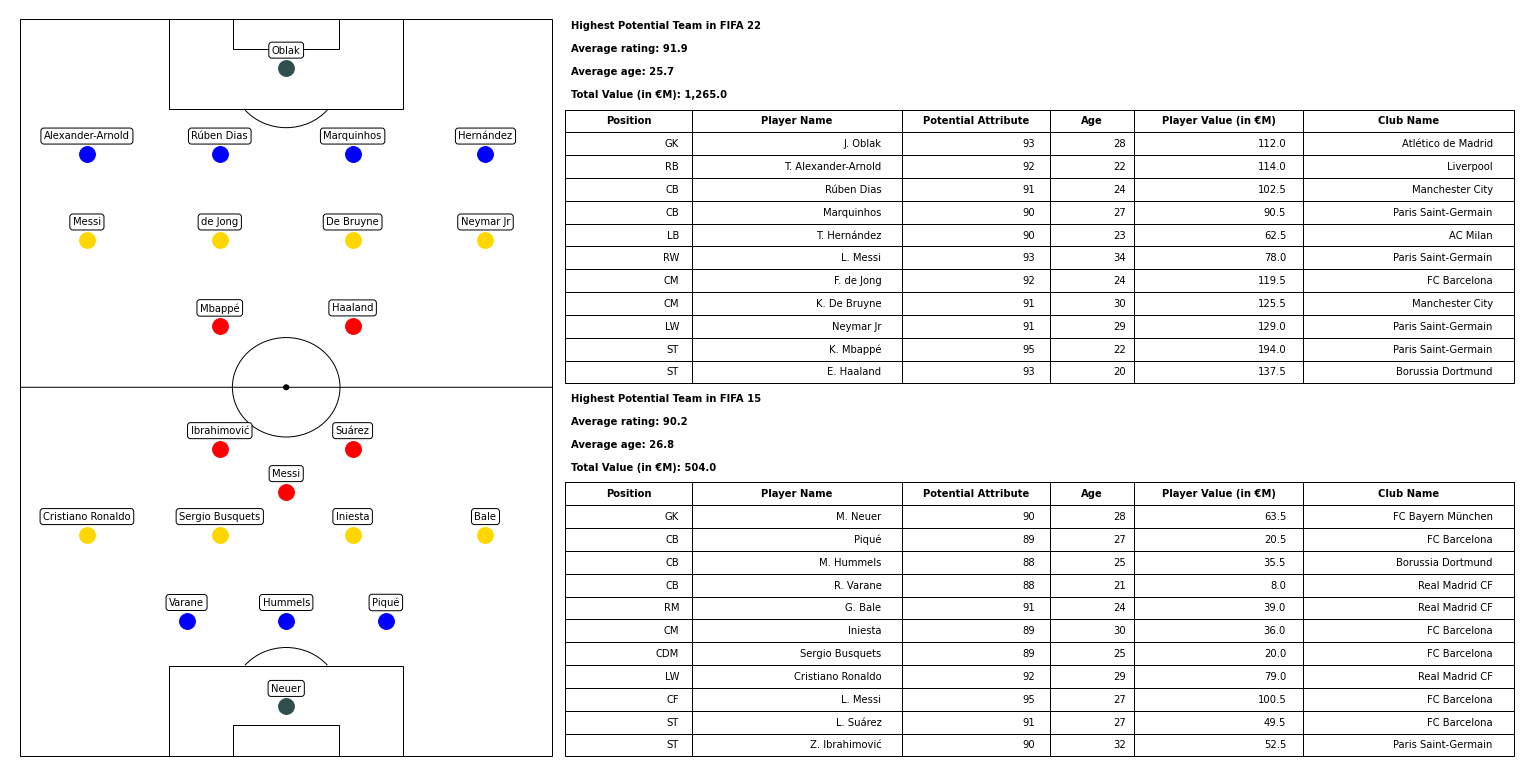

In [5]:
draw_teams_matchup(df22, df15, 'Highest Potential Team in FIFA 22', 'Highest Potential Team in FIFA 15', measurement='potential')

#### Highest Potential Team of previous FIFA versions (Potential attributes)

<br>

<i>In the match-up between the FIFA 20 and 21 players - based on the potential attribute - there is no significant difference in the average player overall rating (92.2 for FIFA 21 vs 92.5 for FIFA 20), but the difference in the average player age is quite evident (with FIFA 21 having younger players on the pitch compared to FIFA 20 - 23.6 vs 25.5).</i>

<i>Jao Felix was considered one of the best potential strikers in FIFA 20 and 21, but did not keep the high promises given that he has been excluded from the top 11 potential players in FIFA 22.</i>

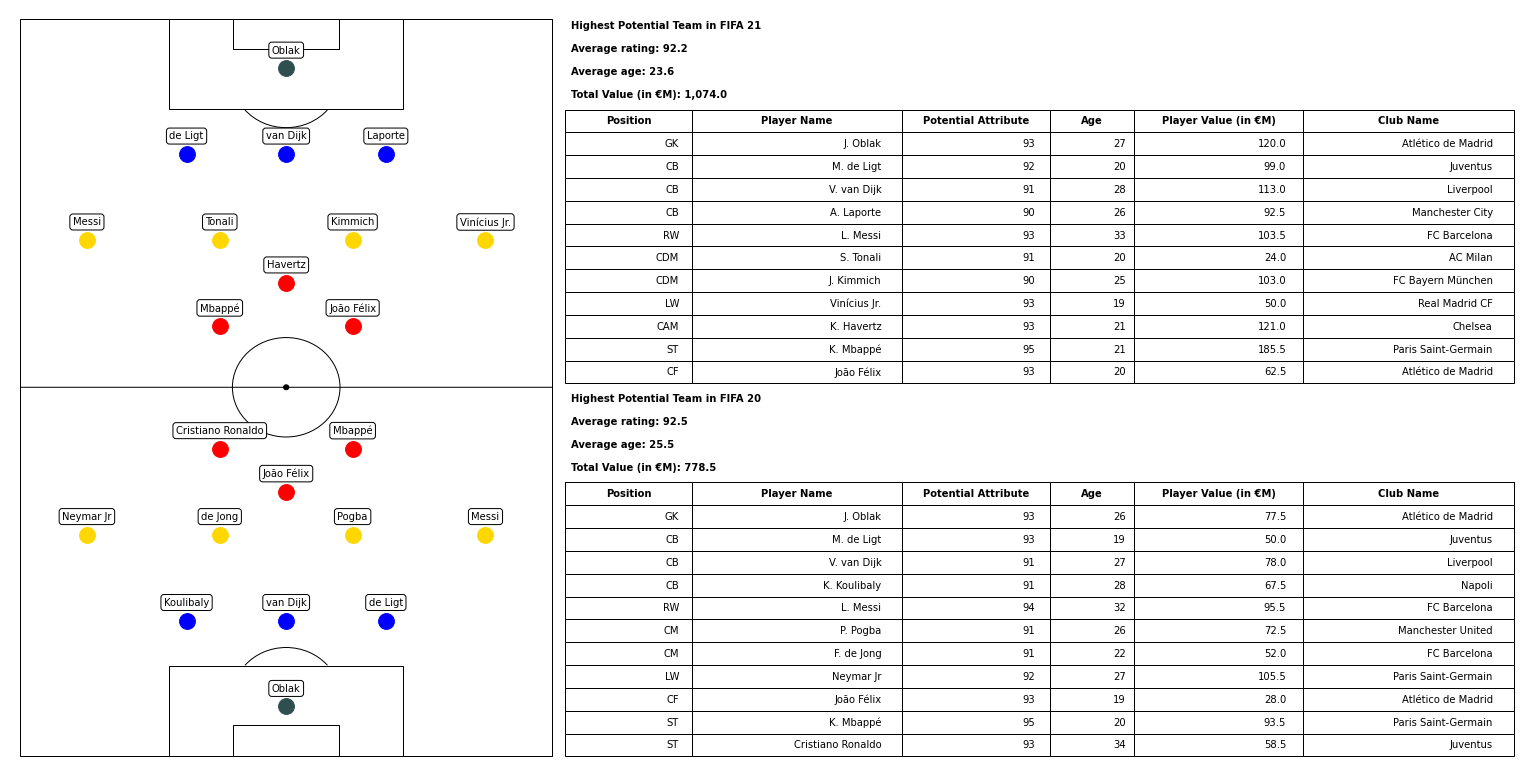

In [6]:
draw_teams_matchup(df21, df20, 'Highest Potential Team in FIFA 21', 'Highest Potential Team in FIFA 20', measurement='potential')

<i>In the match-up between the FIFA 18 and 19 players - based on the potential attribute - there is no significant difference in the average player overall rating (92.2 for FIFA 18 vs 92.6 for FIFA 19) and age (26.0 for FIFA 18 vs 26.3 for FIFA 19).</i>

<i>Varane was considered one of the best potential defenders in FIFA 18 and 19, but did not keep the high promises given that he has been excluded from the top 11 potential players in FIFA 20.</i>

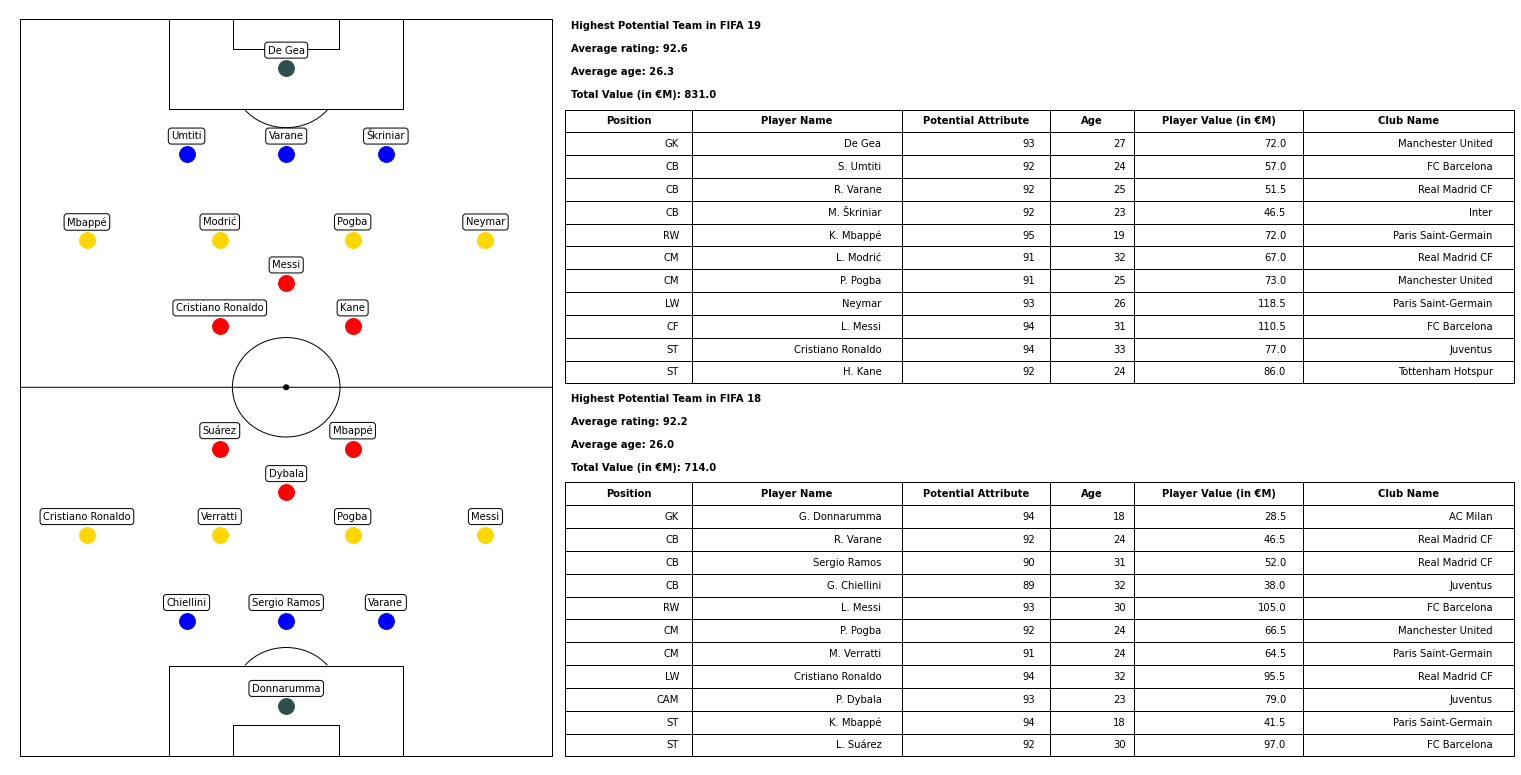

In [7]:
draw_teams_matchup(df19, df18, 'Highest Potential Team in FIFA 19', 'Highest Potential Team in FIFA 18', measurement='potential')

<i>In the match-up between the FIFA 16 and 17 players - based on the potential attribute - there is quite a difference in the average player overall rating (90.7 for FIFA 16 vs 92.0 for FIFA 17) and age (26.9 for FIFA 16 vs 25.1 for FIFA 17).</i>

<i>J. Rodriguez was considered one of the best potential midfielders in FIFA 16 and 17, but did not keep the high promises given that he has been excluded from the top 11 potential players in FIFA 18.</i>

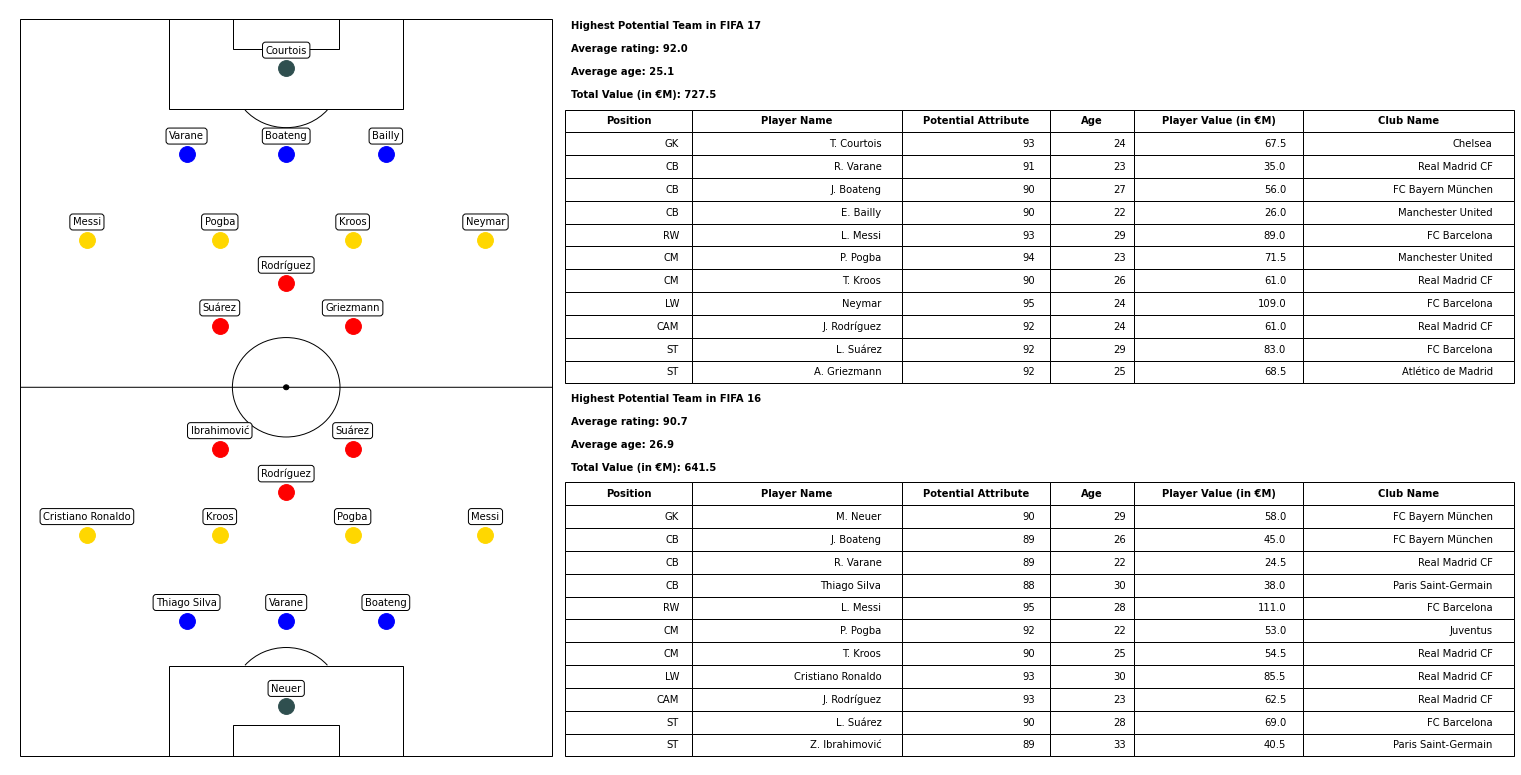

In [8]:
draw_teams_matchup(df17, df16, 'Highest Potential Team in FIFA 17', 'Highest Potential Team in FIFA 16', measurement='potential')

## <a id='32'>3.2. Lineup Visualizations of most popular European national leagues</a>

#### Liverpool and ManCity FIFA 22 and FIFA 15 squads with the best players (Overall attributes)

<br>

<i>In the match-up between Liverpool and ManCity in the latest FIFA version - based on the overall attribute - both teams have the same 4-3-3 formation, but Liverpool has a sligthly better average overall rating (86.7 vs 86.1) while ManCity has a lower average player age (26.7 vs 28.2).</i>

<i>The younger ManCity players also exhibit a higher market value compared to Liverpool, with a total of €858 M.</i>

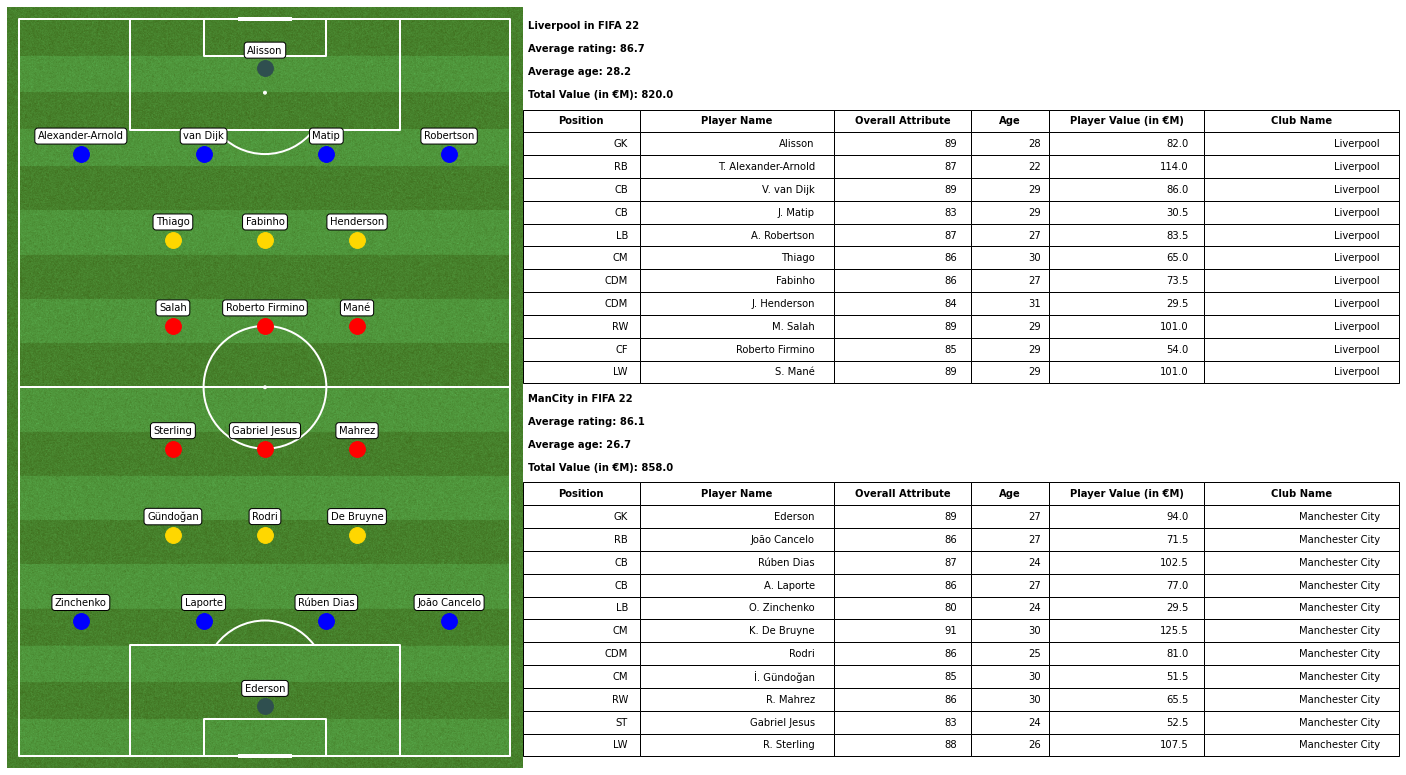

In [9]:
draw_teams_matchup(df22, df22, 'Liverpool in FIFA 22', 'ManCity in FIFA 22', home_team_name='Liverpool', away_team_name='Manchester City', drawn_pitch='mplsoccer')

<i>In the same match-up in the first available FIFA version - based on the overall attribute -  shows a much weaker version of Liverpool, which has an average player rating of 80.4 - much lower than the ManCity's 83.3.</i>

<i>On the other hand, ManCity had an older lineup, with an average player age of 27.7 - much higher than the Liverpool's 25.1.</i>

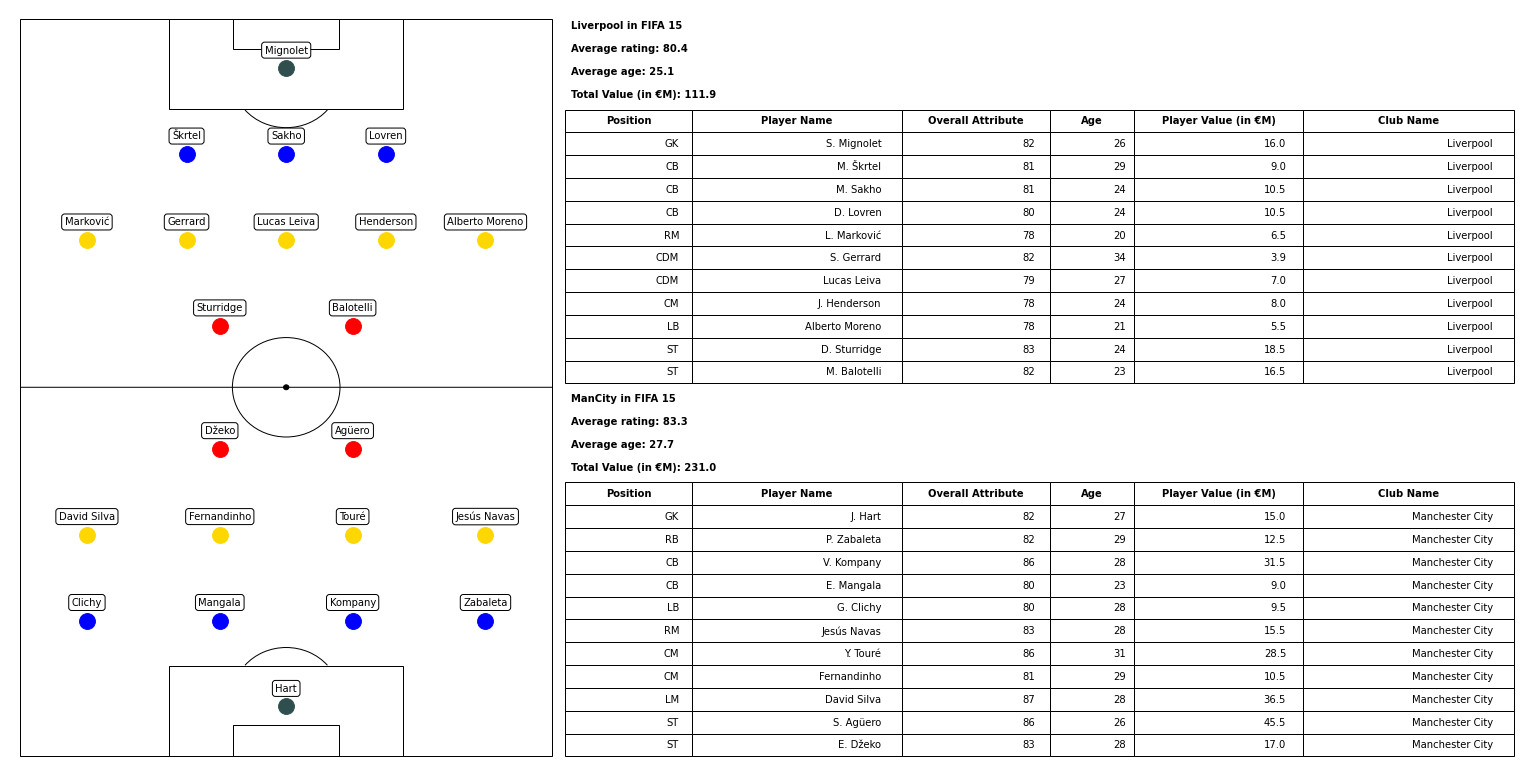

In [10]:
draw_teams_matchup(df15, df15, 'Liverpool in FIFA 15', 'ManCity in FIFA 15', home_team_name='Liverpool', away_team_name='Manchester City')

#### Real Madrid and Barcelona FIFA 22 and FIFA 15 squads with the best players (Overall attributes)

<br>

<i>In the match-up between RealMadrid and Barcelona in the latest FIFA version - based on the overall attribute - both teams have now lost their top scorer (C. Ronaldo departing RealMadrid in 2018 and Messi departing Barcelona in 2021), but have remained competitive with their average overall rating around 85 (RealMadrid 85.8 vs Barcelona 84.6).</i>

<i>Barcelona is a younger team compared to RealMadrid, with Pedri (18 yo) representing a positive outlier and a great prospect.</i>

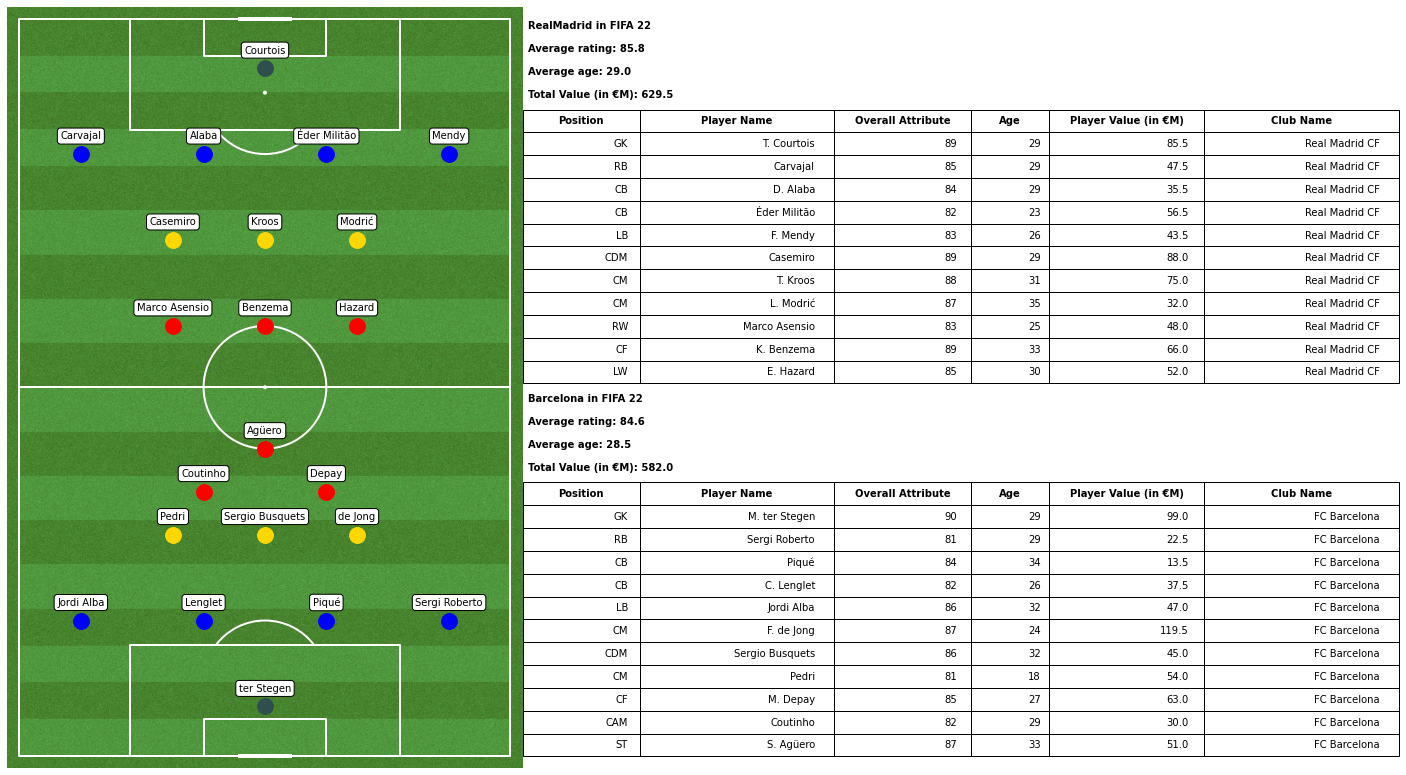

In [11]:
draw_teams_matchup(df22, df22, 'RealMadrid in FIFA 22', 'Barcelona in FIFA 22', home_team_name='Real Madrid CF', away_team_name='FC Barcelona', drawn_pitch='mplsoccer')

<i>In the same match-up in the first available FIFA version - based on the overall attribute - both teams have similar average player rating compared to FIFA 22 and the same total player value (€319.5 M).</i>

<i>Barcelona was a sligthly better team than Real Madrid, with the strikers Messi, Suarez, and Neymat (also known as MSN) making the difference.</i>

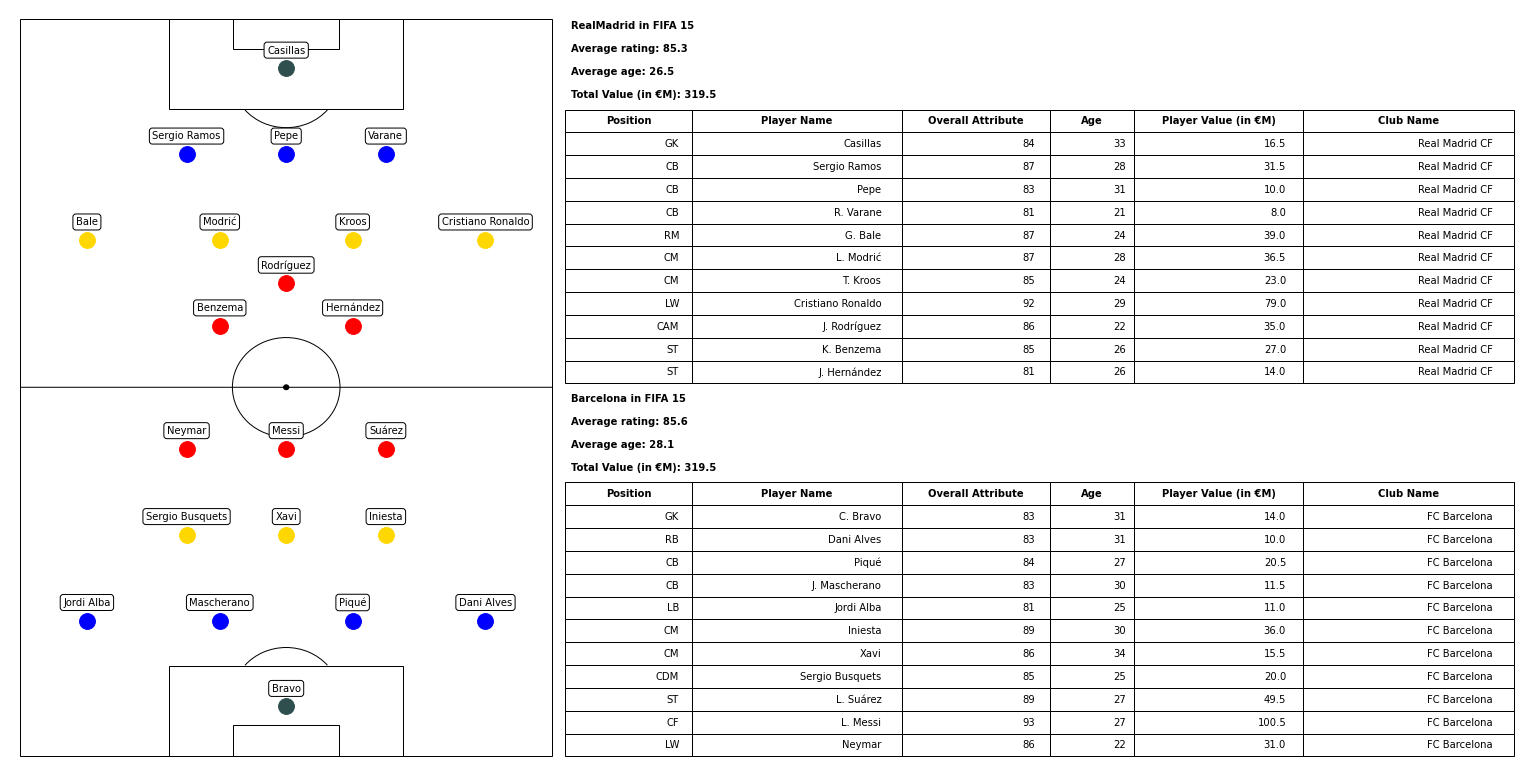

In [12]:
draw_teams_matchup(df15, df15, 'RealMadrid in FIFA 15', 'Barcelona in FIFA 15', home_team_name='Real Madrid CF', away_team_name='FC Barcelona')

#### Juventus and Inter FIFA 22 and FIFA 15 squads with the best players (Overall attributes)

<br>

<i>In the match-up between Juventus and InterMilan in the latest FIFA version - based on the overall attribute - both teams have the same 3-5-2 formation and similar average player ratings (84.1 for Juventus vs 83.5 for InterMilan) after the suffered departures of C. Ronaldo and Lukaku.</i>

<i>The average player age is quite similar, with InterMilan showing a sligthly lower value (28.1) compared to Juventus (28.5).</i>

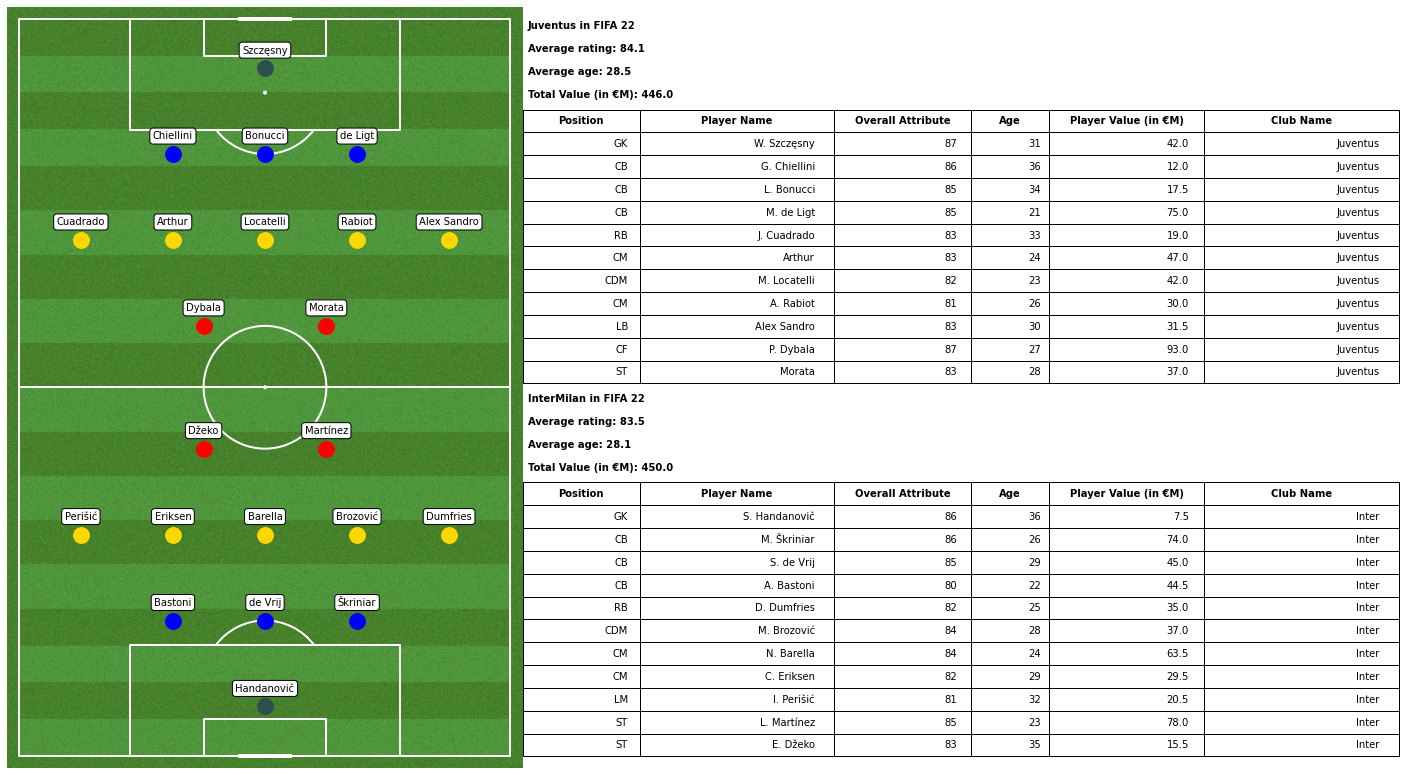

In [13]:
draw_teams_matchup(df22, df22, 'Juventus in FIFA 22', 'InterMilan in FIFA 22', home_team_name='Juventus', away_team_name='Inter', drawn_pitch='mplsoccer')

<i>In the same match-up in the first available FIFA version - based on the overall attribute - both teams were much worse compared to the last FIFA version, but the difference in average player rating is more evident for InterMilan (83.5 in FIFA 22 vs 79.3 in FIFA 15).</i>

<i>Juventus was very old in FIFA 15, especially in the defence with Buffon (36), Barzagli (33), and Chiellini (29).</i>

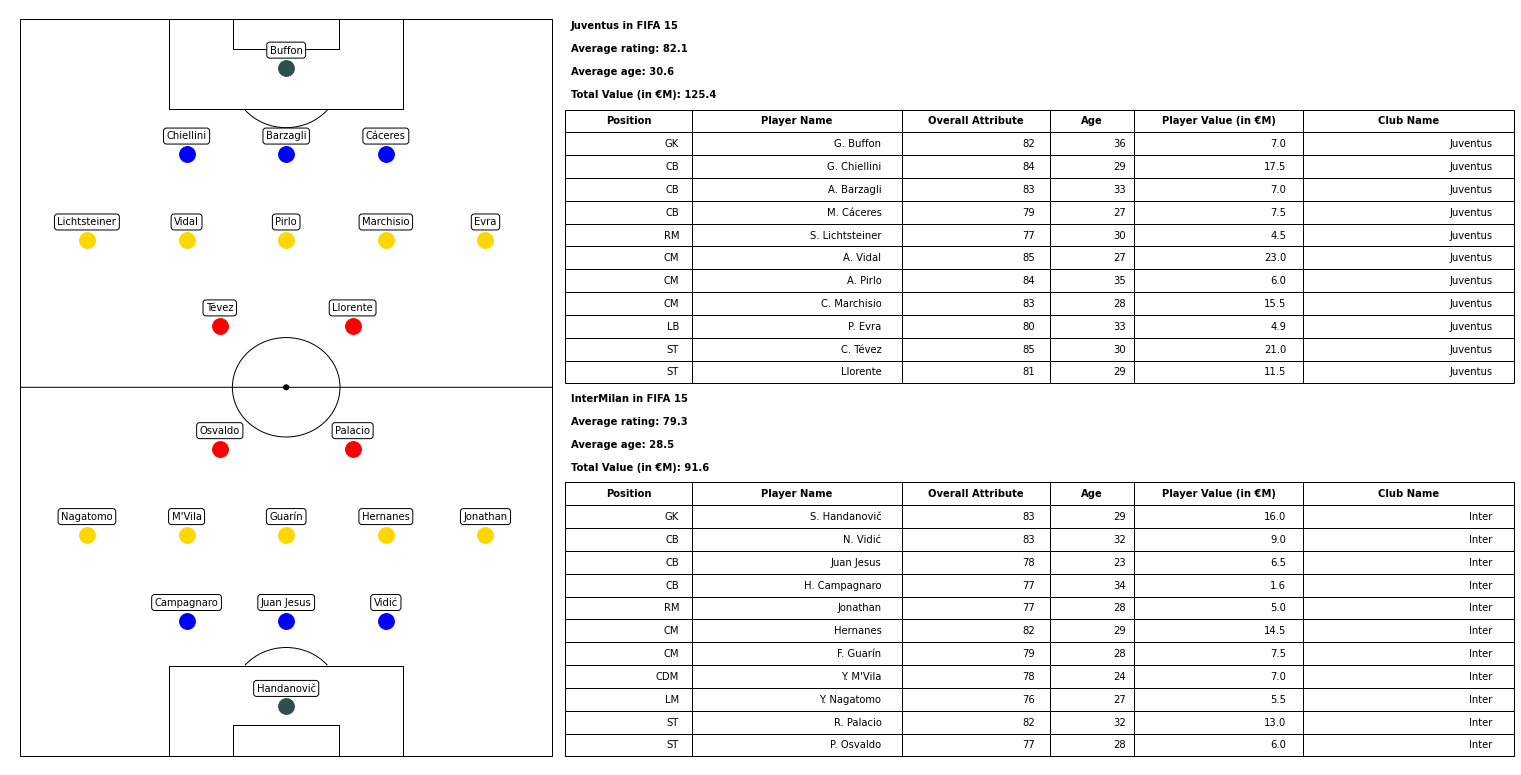

In [14]:
draw_teams_matchup(df15, df15, 'Juventus in FIFA 15', 'InterMilan in FIFA 15', home_team_name='Juventus', away_team_name='Inter')

#### Bayern Munich and Borussia Dortmund FIFA 22 and FIFA 15 squads with the best players (Overall attributes)

<br>

<i>In the match-up between BayernMunich and BorussiaDortmund in the latest FIFA version - based on the overall attribute - Bayern has a better team, with a higher average player rating (84.6 vs 82.3 for BorussiaDortmund), while the average player age is similar in the two teams (27.8 for BayernMunich vs 27.6 for BorussiaDortmund).</i>

<i>Quite suprisingly, the worst player on the pitch in this match-up plays for BayernMunich (Choupo-Moting, with 76 overall rating).</i>

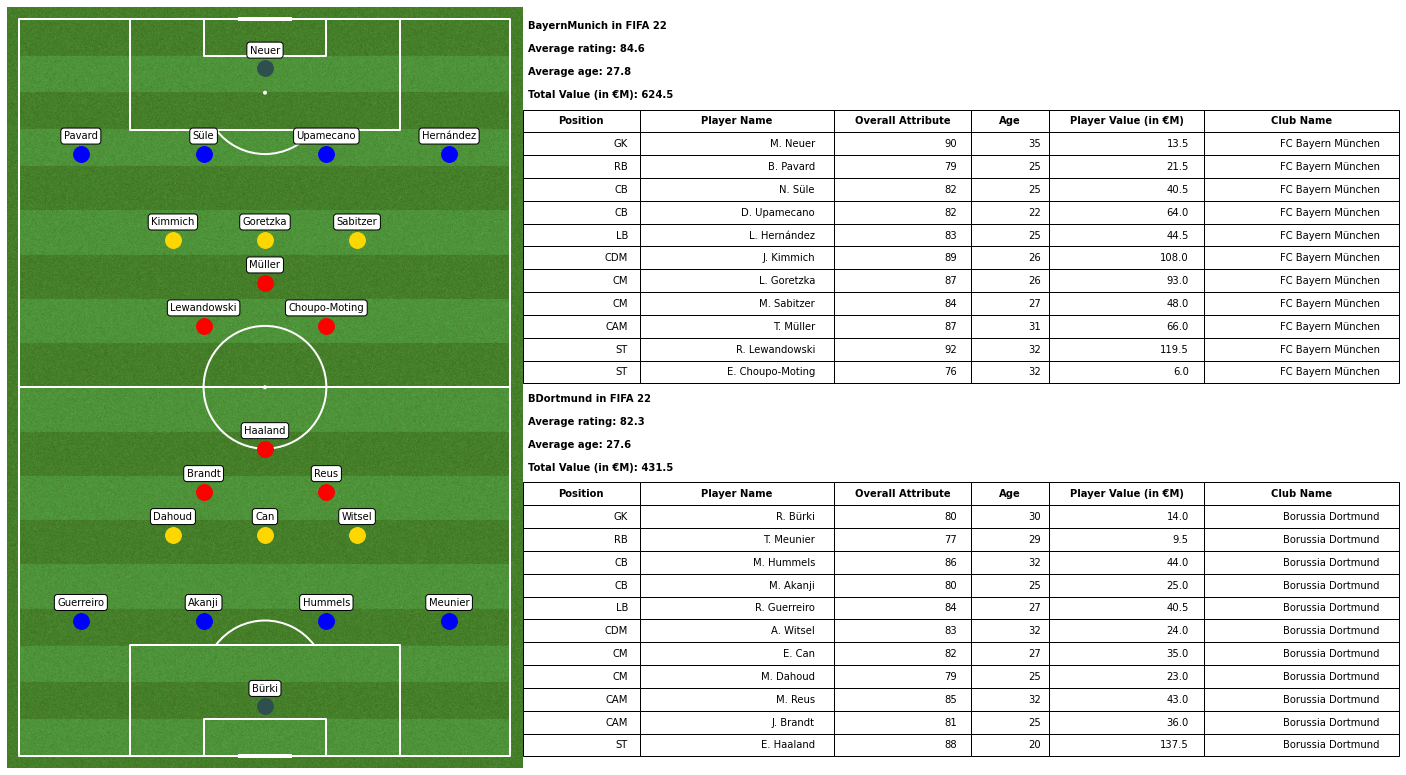

In [15]:
draw_teams_matchup(df22, df22, 'BayernMunich in FIFA 22', 'BDortmund in FIFA 22', home_team_name='FC Bayern München', away_team_name='Borussia Dortmund', drawn_pitch='mplsoccer')

<i>In the same match-up in the first available FIFA version - based on the overall attribute - BayernMunich was a stronger side (86.2 average rating in FIFA 15 vs 84.6 in FIFA 22) while BorussiaDortmund did not improve dramatically but was much younger (26.1 average age in FIFA 15 vs 27.6 in FIFA 22).</i>

<i>BayernMunich used to play with the inconic pair of wingers Ribery and Robben, which were the among the oldest players in the team, second only to Pizarro.</i>

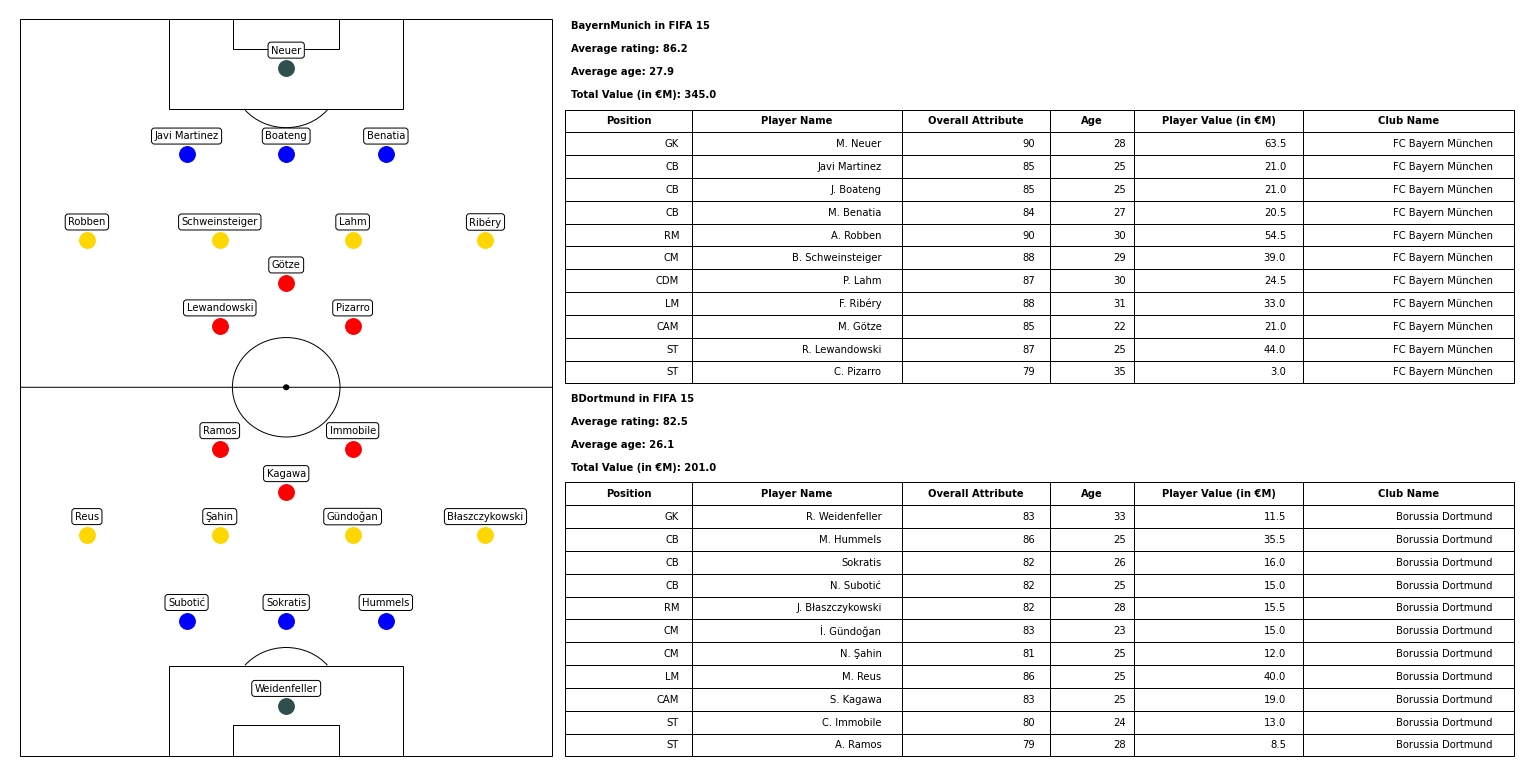

In [16]:
draw_teams_matchup(df15, df15, 'BayernMunich in FIFA 15', 'BDortmund in FIFA 15', home_team_name='FC Bayern München', away_team_name='Borussia Dortmund')

### Paris Saint-Germain and Olympique Lyonnais FIFA 22 and FIFA 15 squads with the best players (Overall attributes)

<br>

<i>In the match-up between PSG and Lyon in the latest FIFA version - based on the overall attribute - PSG has a much better team, with a higher average player rating (87.3 vs 79.7 for Lyon), while has a younger lineup (26.4 average age for Lyon vs 27.7 for PSG) mainly due to the veterans Messi and Sergio Ramos.</i>

<i>PSG is the only team in FIFA 22 to have three offensive players with an overall rating above 90 (Messi, Neymar, and Mbappe).</i>

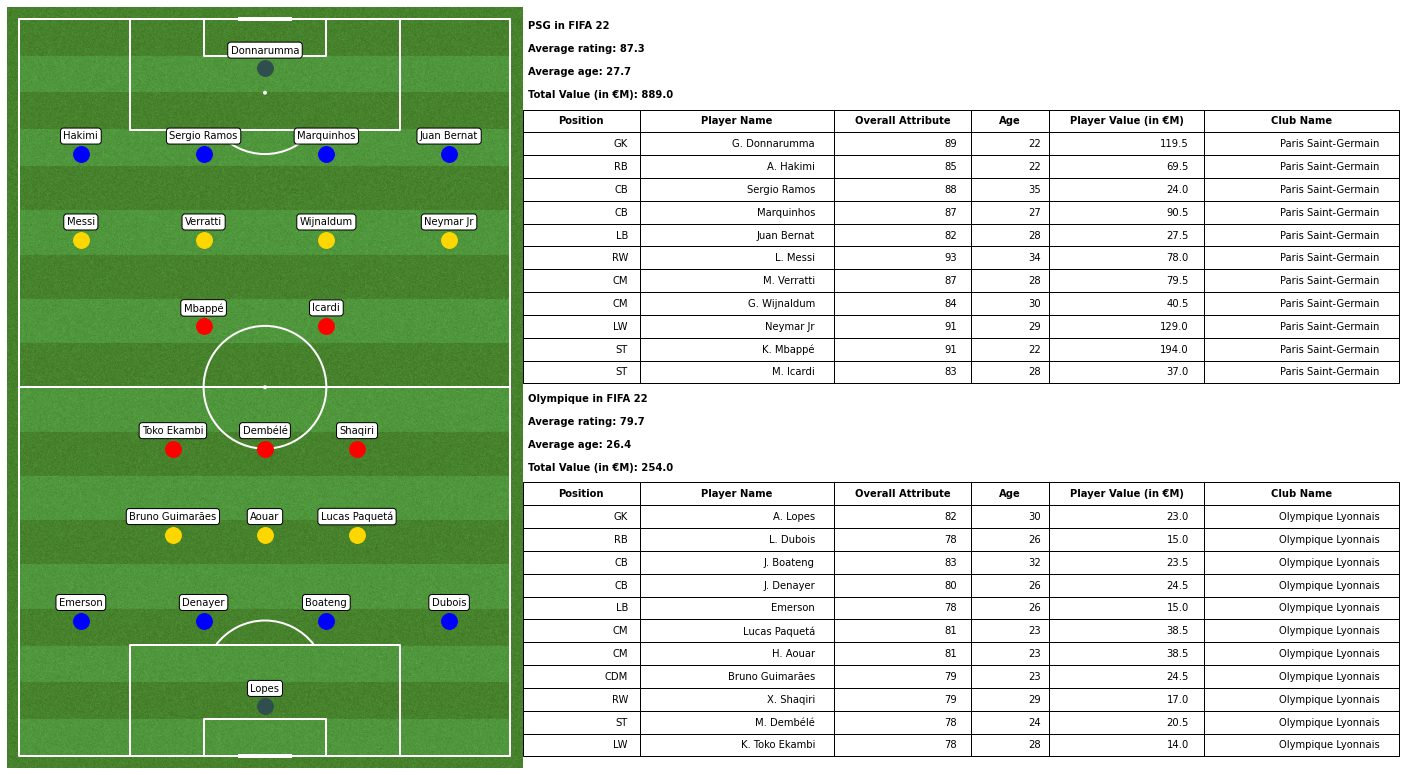

In [17]:
draw_teams_matchup(df22, df22, 'PSG in FIFA 22', 'Olympique in FIFA 22', home_team_name='Paris Saint-Germain', away_team_name='Olympique Lyonnais', drawn_pitch='mplsoccer')

<i>In the same match-up in the first available FIFA version - based on the overall attribute - both teams were weaker, with PSG falling from an average player rating of 87.3 to 82.8, and Lyon falling from 79.7 to 76.5.</i>

<i>PSG maintained the same 4-4-2 formation, but without a single player from FIFA 15 that remained in the PSG lineup of FIFA 22.</i>

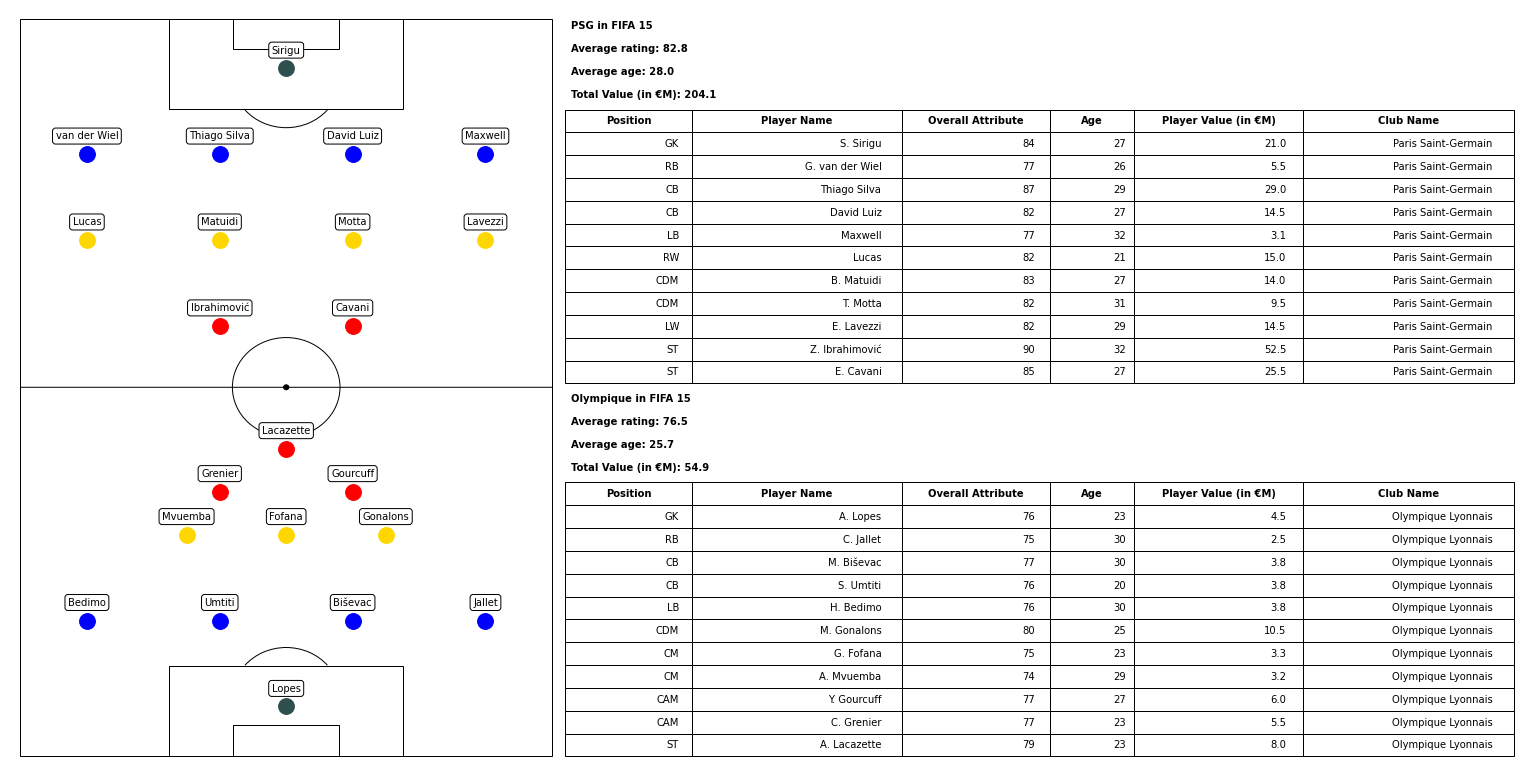

In [18]:
draw_teams_matchup(df15, df15, 'PSG in FIFA 15', 'Olympique in FIFA 15', home_team_name='Paris Saint-Germain', away_team_name='Olympique Lyonnais')

# <a id='4'>4. Clubs Analysis</a>

The following analysis of clubs, leagues, and players is based on the top100 clubs that have been selected based on their best players' overall attributes in the latest FIFA version.

Once the 100 clubs with the best players in FIFA 22 have been selected, their best 11-man lineup was calculated, along with values such as average overall attribute, age, player values, etc.

An alterntive - and quicker - approach would have been the calculation of clubs' overall attributes based on the lineup players that FIFA select as being part of their best 11-man lineup, but that would have excluded all injured players or players that were not included in the latest games due to lack of fitness, coach decisions, etc.

In [19]:
def get_club_lineup_data(lineup_df, fifa_version, club_name):
    df_copy = lineup_df[lineup_df['club_name'] == club_name]
    formation = get_best_formation(lineup_df, club_name, measurement='overall')
    squad_lineup = formations_dict[formation]
    if len(df_copy) < 20:
        raise ValueError('Club ' + club_name + ' does not have enough players in FIFA ' + str(fifa_version) + ': ' + str(len(df_copy)))
    # granular-level df with the players data
    squad_players_df = pd.DataFrame(columns=['position', 'overall', 'age', 'value'])
    for pos in squad_lineup:
        best_player_record = df_copy.loc[[df_copy[df_copy['best_position'].str.contains(pos)]['overall'].idxmax()]]
        squad_players_df.loc[best_player_record['short_name'].to_string(index=False).strip(' \t')] = [
            best_player_record['best_position'].to_string(index=False).strip(' \t'),
            float(best_player_record['overall']), float(best_player_record['age']), float(best_player_record['value_million_eur'])]
        df_copy.drop(df_copy[df_copy['best_position'].str.contains(pos)]['overall'].idxmax(), inplace=True)
    # aggregate-level df with grouped data
    squad_players_df = squad_players_df.sort_values(by=['value', 'overall'], ascending=[False, False])
    squad_df = pd.DataFrame({'fifa_version': [fifa_version], 'club_name': [club_name], 'formation': [formation],
                'overall': [round(squad_players_df['overall'].mean(), 2)], 'age': [round(squad_players_df['age'].mean(), 2)],
                'value': [round(squad_players_df['value'].mean(), 2)],
                'position_best_overall': [squad_players_df.loc[squad_players_df['overall'].idxmax()]['position']],
                'position_best_value': [squad_players_df.loc[squad_players_df['value'].idxmax()]['position']]})
    return squad_df


# getting the first 100 clubs based on the current player overall ratings in FIFA 22
# the FIFA 22 dataset is already sorted by the overall attributes, so it is failry easy to find the first 100 club names in the file
top100_clubs = df22[~df22['club_name'].isnull()]['club_name'].unique().tolist()[:100]
top100_clubs_df = pd.DataFrame(columns=['fifa_version', 'club_name', 'formation', 'overall', 'age', 'value',
                                        'position_best_overall', 'position_best_value'])

for version_n in [15, 16, 17, 18, 19, 20, 21, 22]:
    filtered_df = players_df[players_df['fifa_version'] == version_n][
        ['short_name', 'club_name', 'league_name', 'best_position', 'overall', 'age', 'value_million_eur']]
    for top100_club_name in top100_clubs:
        try:
            club_df = get_club_lineup_data(filtered_df, fifa_version=version_n, club_name=top100_club_name)
        except ValueError: # raised for clubs that do not have enough players in the roster to have their best lineup cauclated
            continue
        top100_clubs_df = pd.concat([top100_clubs_df, club_df], axis=0)
top100_clubs_df.index = range(1, len(top100_clubs_df)+1) # assigning a unique index value to each record
fifa22_club_leagues_df = players_df[players_df['fifa_version'] == 22].drop_duplicates(subset='club_name')[['club_name', 'league_name']]
top100_clubs_df = top100_clubs_df.merge(right=fifa22_club_leagues_df, how='left')

# filtering only the clubs' data for the major leagues, so that further details can emerge from the plots
top_leagues = ['English Premier League', 'Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga', 'French Ligue 1']
leagues_top100_clubs_df = top100_clubs_df[top100_clubs_df['league_name'].isin(top_leagues)]

# below is the info needed for the plotly graphs
total_boxes = len(top100_clubs_df['fifa_version'].unique().tolist())
clrs = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, total_boxes + 1)]

# displaying the top15 clubs data in FIFA 22 based on their best players' overall attributes
top100_clubs_df[top100_clubs_df['fifa_version'] == 22].sort_values(by='overall', ascending=False).head(15)

fifa_version            club_name formation  overall    age  value  \
637           22  Paris Saint-Germain     4-4-2    87.27  27.73  80.82   
646           22            Liverpool     4-3-3    86.73  28.18  74.55   
640           22      Manchester City     4-3-3    86.09  26.73  78.00   
645           22       Real Madrid CF     4-3-3    85.82  29.00  57.23   
639           22    Manchester United   3-4-1-2    85.27  28.00  57.86   
641           22   Atlético de Madrid     3-5-2    85.18  29.00  52.77   
642           22         FC Barcelona   4-3-2-1    84.64  28.45  52.91   
638           22    FC Bayern München   4-3-1-2    84.64  27.82  56.77   
644           22              Chelsea   3-4-1-2    84.64  28.00  53.41   
648           22             Juventus     3-5-2    84.09  28.45  40.55   
650           22                Inter     3-5-2    83.45  28.09  40.91   
655           22           Sevilla FC     4-3-3    82.64  28.73  30.14   
647           22    Borussia Dortmund   4-3-2-1    82.27  27.64  39.23   
643           22    Tottenham Hotspur   4-3-2-1    81.91  25.55  38.50   
660           22             AC Milan     4-4-2    81.82  28.09  30.50   

    position_best_overall position_best_value             league_name  
637                    RW                  ST          French Ligue 1  
646                    RW                  RB  English Premier League  
640                    CM                  CM  English Premier League  
645                   CDM                 CDM  Spain Primera Division  
639                    ST                  RM  English Premier League  
641                    GK                  GK  Spain Primera Division  
642                    GK                  CM  Spain Primera Division  
638                    ST                  ST    German 1. Bundesliga  
644                   CDM                 CDM  English Premier League  
648                    CF                  CF         Italian Serie A  
650                    CB                  ST         Italian Serie A  
655                    LB                  CB  Spain Primera Division  
647                    ST                  ST    German 1. Bundesliga  
643                    ST                  ST  English Premier League  
660                    LB                  LB         Italian Serie A

Displaying the distribution across FIFA versions of teams' lineup overall values (in million €) among the top100 clubs.

<i>The highest value a lineup has ever had was Liverpool in FIFA 21, with an average player value in the 11-man lineup of €88.6M, even higher than PSG in FIFA 22 (€80.2M average player value in the best lineup).</i>

<i>In general, club values started to dramatically increase in FIFA 21, with the upper quartile range rising from €30M of the previous year to €50M. Club values increased in a such evident way that the upper quartile range of €30M in FIFA 20 was very close to the highest team average value in FIFA 15 (BayernMunich - 31.4 average player rating in the best lineup)</i>

In [20]:
fig = go.Figure()
for i, version_n in enumerate(top100_clubs_df['fifa_version'].unique()):
    df_plot = top100_clubs_df[top100_clubs_df['fifa_version'] == version_n]
    fig.add_trace(go.Box(y=df_plot['value'], x=df_plot['fifa_version'], name=str(version_n),
                         boxpoints='outliers', jitter=0.5, whiskerwidth=0.2, line=dict(color='black'),
                         fillcolor=clrs[i], marker_size=2, line_width=1,
                         hovertext=df_plot['club_name'], hovertemplate='<b>%{hovertext}</b>:<br>value: %{y:.2f}'))
fig.update_layout(title='Value (in €M) distribution of Top100 clubs for each FIFA version', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='FIFA Version', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Value (in €M)', zeroline=False))
fig.show()

Displaying the distribution across FIFA versions of teams' lineup overall attributes among the top100 clubs.

<i>The highest average rating a lineup has ever had was Barcelona in FIFA 19, with an average player attribute in the 11-man lineup of 87.9, even higher than PSG in FIFA 22 (87.3 average player rating in the best lineup).</i>

<i>In general, club values started to dramatically increase in FIFA 21, with the upper quartile range rising from €30M of the previous year to €50M. Club values increased in a such evident way that the upper quartile range of €30M in FIFA 20 was very close to the highest team average value in FIFA 15 (BayernMunich - 31.4 average player rating in the best lineup)</i>

In [21]:
fig = go.Figure()
for i, version_n in enumerate(top100_clubs_df['fifa_version'].unique()):
    df_plot = top100_clubs_df[top100_clubs_df['fifa_version'] == version_n]
    fig.add_trace(go.Box(y=df_plot['overall'], x=df_plot['fifa_version'], name=str(version_n),
                         boxpoints='outliers', jitter=0.5, whiskerwidth=0.2, line=dict(color='black'),
                         fillcolor=clrs[i], marker_size=2, line_width=1,
                         hovertext=df_plot['club_name'], hovertemplate='<b>%{hovertext}</b>:<br>overall: %{y:.2f}'))
fig.update_layout(title='Overall attribute distribution of Top100 clubs for each FIFA version', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='FIFA Version', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Overall', zeroline=False))
fig.show()

Displaying the distribution across FIFA versions of teams' lineup average age among the top100 clubs.

<i>The last three FIFA editions have seen a small increase in the average age of the top100 clubs, shifting from the median age of 27.5 years in FIFA 20 to 28 years in FIFA 22.</i>

<i>It is worth to notice the outliers Beşiktaş JK, with an average lineup age of 32.7 years, and Ajax, the club with the two lowest historical values overall (21.9 years in FIFA 16 and 22.6 years in FIFA 17)</i>

In [22]:
fig = go.Figure()
for i, version_n in enumerate(top100_clubs_df['fifa_version'].unique()):
    df_plot = top100_clubs_df[top100_clubs_df['fifa_version'] == version_n]
    fig.add_trace(go.Box(y=df_plot['age'], x=df_plot['fifa_version'], name=str(version_n),
                         boxpoints='outliers', jitter=0.5, whiskerwidth=0.2, line=dict(color='black'),
                         fillcolor=clrs[i], marker_size=2, line_width=1,
                         hovertext=df_plot['club_name'], hovertemplate='<b>%{hovertext}</b>:<br>Age: %{y:.2f}'))
fig.update_layout(title='Age distribution of Top100 clubs for each FIFA version', title_x=0.5, font=dict(size=12), template='plotly_white',
                  autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10), legend_title='FIFA Version',
                  xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Age', zeroline=False))
fig.show()

Displaying the trend of average lineup ratings across FIFA versions among the top15 clubs.

<i>The last three FIFA editions have seen a small increase in the average age of the top100 clubs, shifting from the median age of 27.5 years in FIFA 20 to 28 years in FIFA 22.</i>

<i>The two highest average lineup ratings were recorded in FIFA 19 for Barcelona (87.9) and RealMadrid (87.7 - tied with BayernMunich rating in FIFA 17), but both teams started to fall up to FIFA 22, where they are not even in the top3 teams - which are PSG, Liverpool, and ManCity.</i>

In [23]:
fig = px.line(top100_clubs_df[top100_clubs_df['club_name'].isin(
    top100_clubs_df[top100_clubs_df['fifa_version']==22].sort_values(by='overall', ascending=False)['club_name'][:15])],
              x='fifa_version', y='overall', color='club_name')
fig.update_layout(title='Overall attribute trend of the current Top15 clubs from FIFA 15 to FIFA 22', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='Club Name', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Overall', zeroline=False))
fig.show()

# <a id='5'>5. Leagues Analysis</a>

Displaying the distribution across FIFA versions and best leagues of lineup overall values (in million €) among the top100 clubs.

<i>Clubs in the English Premier League significatly increased their value in the last two FIFA editions, driven mainly by Liverpool and ManCity.</i>

<i>French Ligue 1 is the only league that has always had an outlier (PSG) for each FIFA edition regarding the club overall values (in million €).</i>

<i>Italian Serie A have experienced a decrease in the clubs' overall value between FIFA 21 and FIFA 22, considering the important departures of players like C. Ronaldo, Lukaku, Donnarumma, and Hakimi, who were not replaced appropriately.</i>

In [24]:
fig = px.box(leagues_top100_clubs_df, x='fifa_version', y='value', color='league_name', hover_data=['club_name'])
fig.update_layout(title='Value (in €M) distribution of Top100 clubs for each FIFA version - Broken down by league', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='FIFA Version', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Value (in €M)', zeroline=False))
fig.show()

Displaying the distribution across FIFA versions and best leagues of lineup overall attributes among the top100 clubs.

<i>Considering the parameter used to select the top100 clubs was based on their top players' overall attributes, it is understandable to see an overall improvement for some leagues where clubs such as FC Union Berlin, RB Leipzig, Bologna, and Granada CF used to have low overall attributes in earlier versions of the game.</i>

<i>The overall improvement of English Premier League clubs have been stale over the years, with a peak in FIFA 21 thanks to the excellent Liverpool overall value. Other leagues, such as Spain Primera Division have seen their top teams suffering a drop in the overall attribute.</i>

In [25]:
fig = px.box(leagues_top100_clubs_df, x='fifa_version', y='overall', color='league_name', hover_data=['club_name'])
fig.update_layout(title='Overall attribute distribution of Top100 clubs for each FIFA version - Broken down by league', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='FIFA Version', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Overall', zeroline=False))
fig.show()

Displaying the distribution across FIFA versions and best leagues of lineup age among the top100 clubs.

<i>The Spanish and Italian leagues are the ones with the oldest players in their clubs' lineup, with Genoa and Juventus marking the highest historical average age values.</i>

<i>A virtuous league regarding this aspect is the French Ligue 1, who has kept players in the lineup with low average age, especially in the clubs LOSC Lille and OGC Nice.</i>

<i>The German Bundesliga used to have clubs with very low average age, but there has been a significant age increase in the last five years (from FIFA 18).</i>

In [26]:
fig = px.box(leagues_top100_clubs_df, x='fifa_version', y='age', color='league_name', hover_data=['club_name'])
fig.update_layout(title='Age distribution of Top100 clubs for each FIFA version - Broken down by league', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='FIFA Version', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Age', zeroline=False))
fig.show()

# <a id='6'>6. Players Analysis</a>

Displaying the trend of the top 15 player ratings across FIFA versions.

<i>In the race for the best overall player, Messi and C. Ronaldo have been the contenders for several years, but Messi have won the contest most of the times (only in FIFA 17 C. Ronaldo had a higher rating, while in FIFA 18 they were tied at 94). The race for the best overall player has in FIFA 22 a new potential candidate, with Lewandowski being more rated than C. Ronaldo (now third at 91, tied with Neymar, De Bruyne, Oblak, and Mbappé)</i>

<i>It is worth to notice that, among the top15 players in FIFA 22, the one that had the lowest historical overall attribute was Kimmich in FIFA 15, in which he exhibited an overall value of 63.</i>

In [27]:
# manually amending the Mbappe's short name on FIFA 17 and Neymar's on FIFA 20, 21, and 22
top15_players_df = players_df.copy(deep=True)
top15_players_df.loc[top15_players_df['short_name'] == 'K. Mbappe Lottin', 'short_name'] = 'K. Mbappé'
top15_players_df.loc[top15_players_df['short_name'] == 'Neymar Jr', 'short_name'] = 'Neymar'
top15_players_df = top15_players_df[top15_players_df['long_name'].isin(
    top15_players_df[top15_players_df['fifa_version']==22].sort_values(by=['overall', 'potential'], ascending=[False, False])['long_name'][:15])]
top15_players_df['short_name'] = [x.rsplit('.', 1)[1].strip(' \t') if len(x.rsplit('.', 1)) > 1 else x for x in top15_players_df['short_name']]

fig = px.line(data_frame=top15_players_df, x='fifa_version', y='overall', color='short_name')
fig.update_layout(title='Overall attribute trend of the current Top15 players from FIFA 15 to FIFA 22', title_x=0.5, font=dict(size=12),
                  template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='Player Name', xaxis=dict(title='FIFA Version', zeroline=False), yaxis=dict(title='Overall', zeroline=False))
fig.show()

Calculating the distribution of age and value of the four main player categories: goalkeepers, defenders, midfielders, and forwards.

In [28]:
# split the whole dataset and see the ratio of GKs, DFs, MFs, and FWs for each fifa version, and especially for each category of age and overall
positions_generic_dict = {'GK': 'GK', 'RWB': 'DF', 'RB': 'DF', 'CB': 'DF', 'LB': 'DF', 'LWB': 'DF',
                          'RM': 'MF', 'CM': 'MF', 'CDM': 'MF', 'LM': 'MF', 'CAM': 'MF',
                          'RW': 'FW', 'CF': 'FW', 'ST': 'FW', 'LW': 'FW'}
players_df['generic_position'] = players_df['best_position'].map(positions_generic_dict)

# create the qcut categories for the 'age' and 'value' fields
# age_group
age_group_bins = pd.qcut(players_df['age'], q=5, retbins=False).astype(str)
age_group_list = sorted(age_group_bins.unique().tolist())
age_group_bins = ['<' + re.findall(',\s+(\d{1,3})', x)[0] if age_group_list.index(x) != len(age_group_list) - 1
                  else '>=' + re.findall('\((\d{1,3})', x)[0] for x in age_group_list]
players_df['age_group'] = pd.qcut(players_df['age'], q=5, labels=age_group_bins)
# value_group
value_group_bins = pd.qcut(players_df['value_million_eur'], q=5, retbins=False).astype(str)
value_group_list = sorted(value_group_bins.unique().tolist())
value_group_bins = ['<' + re.findall(',\s+(\d{1,3}\.\d{1,3})', x)[0] if value_group_list.index(x) != len(value_group_list) - 1
                    else '>=' + re.findall('\((\d{1,3}\.\d{1,3})', x)[0] for x in value_group_list]
players_df['value_group'] = pd.qcut(players_df['value_million_eur'], q=5, labels=value_group_bins)

# grouping the qcut categories by age_group
grouped_players_df = players_df.groupby(['fifa_version', 'age_group', 'generic_position']).agg({'sofifa_id': 'count'}).reset_index()
positions_age_df = grouped_players_df.groupby(['fifa_version', 'age_group'])['sofifa_id'].sum().reset_index()
grouped_players_df.rename(columns={'sofifa_id': 'records'}, inplace=True)
positions_age_df.rename(columns={'sofifa_id': 'records_sum'}, inplace=True)
positions_age_df = grouped_players_df.merge(right=positions_age_df, how='inner', on=['fifa_version', 'age_group'])
positions_age_df['perc'] = [round(100 * x / y, 1) for x, y in zip(positions_age_df['records'], positions_age_df['records_sum'])]
positions_age_df.drop(columns=['records', 'records_sum'], inplace=True)
# pivoting the data with the generic_positions categories as columns containing the frequency in % for each FIFA version and age_group
pivoted_age_df = positions_age_df.pivot(
    index=['fifa_version', 'age_group'], columns='generic_position', values='perc')#.reindex(drop=True)#.droplevel(level=1)
pivoted_age_df.columns = pivoted_age_df.columns.astype(str)
pivoted_age_df = pivoted_age_df.reset_index()

# grouping the qcut categories by value_group
grouped_players_df = players_df.groupby(['fifa_version', 'value_group', 'generic_position']).agg({'sofifa_id': 'count'}).reset_index()
positions_value_df = grouped_players_df.groupby(['fifa_version', 'value_group'])['sofifa_id'].sum().reset_index()
grouped_players_df.rename(columns={'sofifa_id': 'records'}, inplace=True)
positions_value_df.rename(columns={'sofifa_id': 'records_sum'}, inplace=True)
positions_value_df = grouped_players_df.merge(right=positions_value_df, how='inner', on=['fifa_version', 'value_group'])
positions_value_df['perc'] = [round(100 * x / y, 1) for x, y in zip(positions_value_df['records'], positions_value_df['records_sum'])]
positions_value_df.drop(columns=['records', 'records_sum'], inplace=True)
# pivoting the data with the generic_positions categories as columns containing the frequency in % for each FIFA version and value_group
pivoted_value_df = positions_value_df.pivot(
    index=['fifa_version', 'value_group'], columns='generic_position', values='perc')#.reindex(drop=True)#.droplevel(level=1)
pivoted_value_df.columns = pivoted_value_df.columns.astype(str)
pivoted_value_df = pivoted_value_df.reset_index()

Displaying the relative distribution of age values based on the players' position.

<i>Striker players on FIFA are, in general, younger than the other categories such as goalkeepers and defenders. A potential explanation for this trend is that strikers tend to retire from football earlier than the other types of players.</i>

<i>Across the latest 8 FIFA versions, the main peculiar trend that can be spotted is that strikers are still the youngest type of player, but their average age is slightly increasing in the last few FIFA versions.</i>

In [29]:
groups = ['GK', 'DF', 'MF', 'FW']
colors = ['darkslategrey', 'blue', 'gold' ,'red']
names = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']

fig = go.Figure()
for g, n, c in zip(groups, names, colors):
    for a in age_group_bins: # list of bins previously selected when creating the qcut categories
        display_legend = True if age_group_bins.index(a) == 0 else False
        fig.add_trace(go.Bar(x=[pivoted_age_df[pivoted_age_df['age_group']==a]['fifa_version'], [a]*len(pivoted_age_df['fifa_version'])],
                             y=pivoted_age_df[pivoted_age_df['age_group']==a][g], marker_color=c, name=n, showlegend=display_legend))
fig.update_layout(barmode='stack',
                  title='Distribution of player Generic Positions for each FIFA Version and Age Group (as % to Total)', title_x=0.5,
                  font=dict(size=12), template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='Player Generic Position', xaxis=dict(title='FIFA Version', zeroline=False),
                  yaxis=dict(title='Generic Position Distribution', zeroline=False))
fig.show()

Displaying the relative distribution of values (in million €) based on the players' position.

<i>Goalkeepers are by far the position where most of the players are low-valued; on the other end, strikers are the most values players. This trend has become more prominent in FIFA year after year.</i>

<i>The defenders' value has a slighly downward trend, opposite to the upward trend for midfielders.</i>

In [30]:
groups = ['GK', 'DF', 'MF', 'FW']
colors = ['darkslategrey', 'blue', 'gold' ,'red']
names = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']

fig = go.Figure()
for g, n, c in zip(groups, names, colors):
    for a in value_group_bins: # list of bins previously selected when creating the qcut categories
        display_legend = True if value_group_bins.index(a) == 0 else False
        fig.add_trace(go.Bar(x=[pivoted_value_df[pivoted_value_df['value_group']==a]['fifa_version'], [a]*len(pivoted_value_df['fifa_version'])],
                             y=pivoted_value_df[pivoted_value_df['value_group']==a][g], marker_color=c, name=n, showlegend=display_legend))
fig.update_layout(barmode='stack',
                  title='Distribution of player Generic Positions for each FIFA Version and Value Group (as % to Total)', title_x=0.5,
                  font=dict(size=12), template='plotly_white', autosize=False, width=800, height=500, margin=dict(l=10, r=10, t=60, b=10),
                  legend_title='Player Generic Position', xaxis=dict(title='FIFA Version', zeroline=False),
                  yaxis=dict(title='Generic Position Distribution', zeroline=False))
fig.show()